In [153]:
import pandas as pd
import numpy as np                 #data analysis and linear algebra

import matplotlib.pyplot as plt
import seaborn as sns              #plotting
%matplotlib inline

import geopandas as gpd             #geography
from shapely.geometry import Point


from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df_1 = pd.read_csv('data_dump/PI01PR02Inmuebles2019-10-10.csv')
df_2 = pd.read_csv('data_dump/PI02PR02Inmuebles2019-10-10.csv')
df_3 = pd.read_csv('data_dump/PI03PR02Inmuebles2019-10-10.csv')
df_4 = pd.read_csv('data_dump/PI04PR02Inmuebles2019-10-10.csv')

/opt/anaconda3/envs/flat/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (51,96,105,110,128,129,134) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/envs/flat/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (39,44,57,95,99,102,105,123,125,126,129,134) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/envs/flat/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (41,57,123,129,131,134) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/envs/flat/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (26,57,60) have mixed types.Sp

In [3]:
original_sizes = (df_1.shape, 
                  df_2.shape,
                  df_3.shape, 
                  df_4.shape)

In [4]:
(np.unique(df_1.columns == df_2.columns),    #check if the dataframes have the same number
np.unique(df_1.columns == df_3.columns),     
np.unique(df_1.columns == df_2.columns), 
np.unique(df_1.columns == df_4.columns))    

(array([ True]), array([ True]), array([ True]), array([ True]))

In [5]:
df = pd.concat([df_1, df_2, df_3, df_4],
              ignore_index=True)        #merge the data into a single dataframe

In [6]:
df.head()       #first 5 rows

,cod_idinmueble,cod_duplicadof1,cod_duplicadof2,cod_duplicadof3,cod_duplicadof4,cod_tipoinmueble,cod_portalinmo,des_refanuncio,des_refanunciante,des_tipoanunciante,...,num_energiaprimar,num_gastoscom,ind_inclgastoscom,ind_licenciaactiv,des_ultimactividad,des_protecpublica,ind_protecpublica,des_urlenlaceadic,fec_lote,imagenes
0,f342493a5b3bbe70b08d81c821f9e2fd,NaN,NaN,NaN,NaN,1,1,57246458,50229589.0,Agencia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-10,https://img10.naventcdn.com/avisos/18/00/57/24...
1,e6f4031b41527cb63b9715b2b526d342,NaN,NaN,NaN,NaN,1,1,57244911,50268422.0,Agencia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-10,https://img10.naventcdn.com/avisos/18/00/57/24...
2,b1d8fa2c573253a788db9d59b94f5b58,NaN,NaN,NaN,NaN,1,1,57244902,143792.0,Agencia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-10,https://img10.naventcdn.com/avisos/18/00/57/24...
3,716169a206251021cc8c55799bf24da6,NaN,NaN,NaN,NaN,1,1,57244843,50268422.0,Agencia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-10,https://img10.naventcdn.com/avisos/18/00/57/24...
4,7e1e1345c41faf0800c62aebc7749723,NaN,NaN,NaN,NaN,1,1,57244939,49382.0,Agencia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-10,https://img10.naventcdn.com/avisos/18/00/57/24...


In [7]:
original_size = df.shape
original_size

(240675, 190)

We're interested in the properties which are for sale, so we filter them

In [8]:
df = df[df['des_operacion'] == 'Compra'].drop('des_operacion', axis=1)

Let's erase the columns which are mostly null values

In [9]:
df.head()

,cod_idinmueble,cod_duplicadof1,cod_duplicadof2,cod_duplicadof3,cod_duplicadof4,cod_tipoinmueble,cod_portalinmo,des_refanuncio,des_refanunciante,des_tipoanunciante,...,num_energiaprimar,num_gastoscom,ind_inclgastoscom,ind_licenciaactiv,des_ultimactividad,des_protecpublica,ind_protecpublica,des_urlenlaceadic,fec_lote,imagenes
0,f342493a5b3bbe70b08d81c821f9e2fd,NaN,NaN,NaN,NaN,1,1,57246458,50229589.0,Agencia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-10,https://img10.naventcdn.com/avisos/18/00/57/24...
1,e6f4031b41527cb63b9715b2b526d342,NaN,NaN,NaN,NaN,1,1,57244911,50268422.0,Agencia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-10,https://img10.naventcdn.com/avisos/18/00/57/24...
2,b1d8fa2c573253a788db9d59b94f5b58,NaN,NaN,NaN,NaN,1,1,57244902,143792.0,Agencia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-10,https://img10.naventcdn.com/avisos/18/00/57/24...
3,716169a206251021cc8c55799bf24da6,NaN,NaN,NaN,NaN,1,1,57244843,50268422.0,Agencia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-10,https://img10.naventcdn.com/avisos/18/00/57/24...
4,7e1e1345c41faf0800c62aebc7749723,NaN,NaN,NaN,NaN,1,1,57244939,49382.0,Agencia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-10,https://img10.naventcdn.com/avisos/18/00/57/24...


In [10]:
df.info()                 #info of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174655 entries, 0 to 236298
Columns: 189 entries, cod_idinmueble to imagenes
dtypes: float64(138), int64(3), object(48)
memory usage: 253.2+ MB


In [11]:
df.iloc[:, 0:10].info()        #info of the first columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174655 entries, 0 to 236298
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cod_idinmueble      174655 non-null  object 
 1   cod_duplicadof1     0 non-null       float64
 2   cod_duplicadof2     0 non-null       float64
 3   cod_duplicadof3     0 non-null       float64
 4   cod_duplicadof4     0 non-null       float64
 5   cod_tipoinmueble    174655 non-null  int64  
 6   cod_portalinmo      174655 non-null  int64  
 7   des_refanuncio      174655 non-null  object 
 8   des_refanunciante   172788 non-null  float64
 9   des_tipoanunciante  174649 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 14.7+ MB


Seems like a some columns have only missing values, we should delete them.

It's important to see that we have 31984 of cod_idinmueble non-null values, the rows might have duplicates but we'll take care of them later.

In [12]:
def remove_null(df):
    null_columns = []
    for col in df.columns:                                   #for all the columns in the dataframe
        if df[col].isnull().sum() > (df.shape[0]*0.9):      #select the ones that are mostly
            null_columns.append(col)                         #empty and add them to the list
            
                                                             
    
    df.drop(null_columns, axis=1, inplace=True)              #delete the null columns 
    
remove_null(df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174655 entries, 0 to 236298
Data columns (total 41 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cod_idinmueble      174655 non-null  object 
 1   cod_tipoinmueble    174655 non-null  int64  
 2   cod_portalinmo      174655 non-null  int64  
 3   des_refanuncio      174655 non-null  object 
 4   des_refanunciante   172788 non-null  float64
 5   des_tipoanunciante  174649 non-null  object 
 6   des_telanunciante   42297 non-null   object 
 7   des_nomanunciante   174198 non-null  object 
 8   fec_publicacion     147047 non-null  object 
 9   fec_captura         174655 non-null  object 
 10  des_provincia       174655 non-null  object 
 11  cod_provincia       174655 non-null  int64  
 12  des_municipio       174195 non-null  object 
 13  des_distritozona    158880 non-null  object 
 14  des_barrio          18887 non-null   object 
 15  des_direccion       163168 non-nul

Much better. Now we need to remove the records that aren¡t on Mexico City and we need to change the datatypes of the columns to sa

In [14]:
geo = gpd.read_file('cdmx_munincipalities.geojson')  #read the geojson file

geo                                                  #geodataframe

,gid,cvegeo,cve_ent,cve_mun,nomgeo,geo_alcaldia,geometry
0,2,09006,09,006,Iztacalco,9006,"MULTIPOLYGON (((-99.05584 19.42196, -99.05589 ..."
1,4,09010,09,010,Álvaro Obregón,9010,"MULTIPOLYGON (((-99.18871 19.39475, -99.18868 ..."
2,5,09013,09,013,Xochimilco,9013,"MULTIPOLYGON (((-99.09870 19.31964, -99.09849 ..."
3,7,09003,09,003,Coyoacán,9003,"MULTIPOLYGON (((-99.13923 19.35687, -99.13772 ..."
4,8,09012,09,012,Tlalpan,9012,"MULTIPOLYGON (((-99.19629 19.30228, -99.19595 ..."
5,10,09004,09,004,Cuajimalpa de Morelos,9004,"MULTIPOLYGON (((-99.25698 19.40043, -99.25694 ..."
6,11,09016,09,016,Miguel Hidalgo,9016,"MULTIPOLYGON (((-99.19058 19.46794, -99.19066 ..."
7,12,09005,09,005,Gustavo A. Madero,9005,"MULTIPOLYGON (((-99.11860 19.58446, -99.11691 ..."
8,14,09008,09,008,La Magdalena Contreras,9008,"MULTIPOLYGON (((-99.20859 19.33610, -99.20867 ..."
9,15,09007,09,007,Iztapalapa,9007,"MULTIPOLYGON (((-99.05813 19.40072, -99.05814 ..."


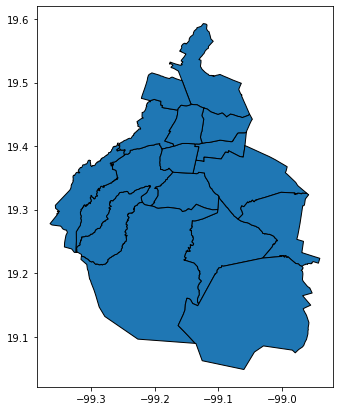

In [15]:
geo.plot(figsize=(10,7), legend=True, edgecolor='k')   #plot the geodataframe

The instructions want to know which properties are in Mexico City with the LATITUDE AND LONGITUDE data so i'll erase the rows with missing latitude and longitude. Also, it seems like both dataframes are using the same coordinate reference system so i'll assume this.

In [16]:
missing_longitude = -(df.num_longitud.isnull())    #filter all the rows that have missing 
missing_latitude = -(df.num_latitud.isnull())      #longitude and latitude

In [17]:
df.dropna(subset=['num_longitud',                  #drop the rows that are missing longitude
                  'num_latitud'], inplace=True)    #or latitude

In [18]:
df.shape

(165671, 41)

In [19]:
geometries = gpd.points_from_xy(df.num_longitud,  df.num_latitud)  #transform the latitude and 
                                                                   #longitude into a geopandas's
coordinates = gpd.GeoDataFrame(geometry=geometries)                #point 

In [20]:
filter = pd.Series().astype('bool')                             #filter all the properties
for i in range(0, 16):                                          #that are in Mexico City
    filter = filter | coordinates.within(geo.geometry[i])       #add the new series to the filter

<ipython-input-20-4292fa1b6f3c>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  filter = pd.Series().astype('bool')                             #filter all the properties


In [21]:
df = df.reset_index()[filter].drop(['index'], axis=1)     #filter the data
remove_null(df)                                           #remove empty columns
df.shape

(161164, 40)

In [22]:
df._get_numeric_data()       #only the numerical columns

,cod_tipoinmueble,cod_portalinmo,des_refanunciante,cod_provincia,des_puerta,num_latitud,num_longitud,num_dormitorios,num_banos,num_aseos,num_supparcela,fec_antiguedad,num_aparcamiento,num_precioventa,num_preciouniventa
0,1,1,50229589.0,2,NaN,19.468009,-99.119330,2.0,1.0,0.0,105.0,NaN,2.0,867000.0,12750.0
1,1,1,50268422.0,2,NaN,19.312534,-99.236283,4.0,4.0,1.0,278.0,1989.0,4.0,7000000.0,NaN
2,1,1,143792.0,2,NaN,19.395873,-99.162681,3.0,3.0,1.0,180.0,2002.0,3.0,8500000.0,NaN
3,1,1,50268422.0,2,NaN,19.509845,-99.146349,4.0,3.0,1.0,198.0,2005.0,3.0,10500000.0,NaN
4,1,1,49382.0,2,NaN,19.327399,-99.141608,4.0,3.0,1.0,274.0,1975.0,NaN,7690000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165666,3,4,22188.0,2,NaN,19.523210,-99.140146,NaN,NaN,NaN,NaN,NaN,NaN,67000000.0,17048.0
165667,3,4,22188.0,2,NaN,19.521875,-99.140361,NaN,NaN,NaN,NaN,NaN,NaN,67000000.0,17048.0
165668,3,4,NaN,2,NaN,19.525006,-99.140476,NaN,NaN,NaN,43.0,NaN,NaN,67000000.0,17048.0
165669,3,4,22555.0,2,NaN,19.529057,-99.135930,NaN,NaN,NaN,43.0,NaN,NaN,67000000.0,14493.0


We begin by removing the numerical variables that are constant, remember that a numerical variable is constant
if and only if it has standard deviation 0

In [23]:
df_numeric = df._get_numeric_data()              #select all the varaibles that are numeric


constant_variables = [variable for variable              #make a list with 
                      in df_numeric.columns if           #all the variables that have
                      df_numeric[variable].std() == 0]   #std 0

constant_variables    

['cod_provincia']

In [24]:
df.iloc[:, 0:20].head()

,cod_idinmueble,cod_tipoinmueble,cod_portalinmo,des_refanuncio,des_refanunciante,des_tipoanunciante,des_telanunciante,des_nomanunciante,fec_publicacion,fec_captura,des_provincia,cod_provincia,des_municipio,des_distritozona,des_direccion,des_nombrevia,des_puerta,num_latitud,num_longitud,des_tipologia
0,f342493a5b3bbe70b08d81c821f9e2fd,1,1,57246458,50229589.0,Agencia,NaN,LIC. DONOVAN LABRADA,2019-10-05,2019-10-05,Distrito Federal,2,Gustavo A. Madero,Guadalupe Tepeyac,NaN,NaN,NaN,19.468009,-99.119330,Casa
1,e6f4031b41527cb63b9715b2b526d342,1,1,57244911,50268422.0,Agencia,NaN,TrueHome,2019-10-05,2019-10-05,Distrito Federal,2,La Magdalena Contreras,Barrio San Francisco,Barrio San Francisco La Magdalena Contreras,NaN,NaN,19.312534,-99.236283,Casa
2,b1d8fa2c573253a788db9d59b94f5b58,1,1,57244902,143792.0,Agencia,NaN,NOVAHOGAR,2019-10-05,2019-10-05,Distrito Federal,2,Benito Juárez,Del Valle,Del Valle Benito Juárez,NaN,NaN,19.395873,-99.162681,Casa
3,716169a206251021cc8c55799bf24da6,1,1,57244843,50268422.0,Agencia,NaN,TrueHome,2019-10-05,2019-10-05,Distrito Federal,2,Gustavo A. Madero,Torres Lindavista,Torres Lindavista Gustavo A. Madero,NaN,NaN,19.509845,-99.146349,Casa
4,7e1e1345c41faf0800c62aebc7749723,1,1,57244939,49382.0,Agencia,NaN,Solaris Inmobiliaria,2019-10-05,2019-10-05,Distrito Federal,2,Coyoacán,Xotepingo,Xotepingo Coyoacán,NaN,NaN,19.327399,-99.141608,Casa


In [25]:
df.iloc[:, 20:40].head()

,num_dormitorios,ind_banos,num_banos,ind_aseos,num_aseos,num_supconstruida,num_supparcela,des_estadoobra,des_estadoconserv,fec_antiguedad,ind_aparcamiento,num_aparcamiento,ind_vigilancia,num_precioventa,num_preciouniventa,des_urlanuncio,des_desinmueble,des_tituloanuncio,fec_lote,imagenes
0,2.0,Si,1.0,NaN,0.0,68,105.0,A estrenar,Excelente,NaN,Si,2.0,Si,867000.0,12750.0,https://www.inmuebles24.com/propiedades/casa-p...,Date la oportunidad de conocer algo diferente....,Casa Premium en Pachuca a 45 Min de La Cdmx,2019-10-10,https://img10.naventcdn.com/avisos/18/00/57/24...
1,4.0,Si,4.0,Si,1.0,NaN,278.0,Segunda mano,NaN,1989.0,Si,4.0,NaN,7000000.0,NaN,https://www.inmuebles24.com/propiedades/av-san...,Espectacular casa de tres niveles a la venta c...,"Av San Francisco, Barrio San Francisco",2019-10-10,https://img10.naventcdn.com/avisos/18/00/57/24...
2,3.0,Si,3.0,Si,1.0,NaN,180.0,Segunda mano,NaN,2002.0,Si,3.0,NaN,8500000.0,NaN,https://www.inmuebles24.com/propiedades/casa-a...,"Magnifica Casa en condominio (SOLO 4 CASAS), c...","Casa a 15 Min. del Centro de Coyoacán, en El C...",2019-10-10,https://img10.naventcdn.com/avisos/18/00/57/24...
3,4.0,Si,3.0,Si,1.0,NaN,198.0,Segunda mano,NaN,2005.0,Si,3.0,NaN,10500000.0,NaN,https://www.inmuebles24.com/propiedades/guanab...,¡Gran Oportunidad! Espectacular casa en Torres...,"Guanabara, Torres Lindavista",2019-10-10,https://img10.naventcdn.com/avisos/18/00/57/24...
4,4.0,Si,3.0,Si,1.0,NaN,274.0,Segunda mano,NaN,1975.0,NaN,NaN,NaN,7690000.0,NaN,https://www.inmuebles24.com/propiedades/venta-...,"Casa de 2 niveles, en muy buena zona... Son 4 ...",Venta Casa Col. Xotepingo,2019-10-10,https://img10.naventcdn.com/avisos/18/00/57/24...


Now we get rid of the columns that bring no real information about the properties. I'll give a brief description of each column(these are my guesses) before removing them.

cod stants for "codigo"

1.- cod_idinmueble	- Id of the property

2.- cod_tipoinmueble - Type of property. There are 6 types of properties but i don't really know what this means.

3.- cod_portalinmo - stands for "codigo del portal inmobiliario", id of the web page

des stands for "descripción"
4.- des_refanuncio - reference of the ad

5.- des_refanunciante - reference of the announcer

6.- des_tipoanunciante - type of announcer

7.- des_telanunciante - phone number of the announcer

8.- des_nomanunciante - name of the announcer 

fec stands for "fecha"
9.- fec_publicacion - date of the publication

10.- fec_captura - 

11.- des_provincia - city

12.- cod_provincia - city code

13.- des_distritozona - colonia

14.- des_municipio - county

15.- des_direccion - direction

16.- des_nombrevia - street name

17.- des_puerta - 

18.- num_latitud - latitude

19.- num_longitud - longitude

20.- des_tipologia - house, apartment, etc

num stands for "number"
21.- num_dormitorios - number of bedrooms

22.- ind_banos - it has bathrooms

23.- num_banos - number of bathrooms

24.- ind_aseos -

25.- num_supconstruida - area that has something built on

26.- num_supparcela - area of the property

27.- des_estadoobra - new, old, etc

28.- des_estadoconserv - state of the property

29.- fec_antiguedad - when it was built

30 .- ind_aparcamiento - it has parking lot

31.- ind_vigilancia - it has security

32.- num_precioventa - price

33.- des_urlanuncio - url of the announcement

34.- des_desinmueble - description of the property

35.- fec_lote -

36.- imagenes - pictures

37.- num_aseos - 

38.- num_aparcamiento - number of parking lots

39.- num_precioventa - 

40.- des_tituloanuncio - title of the announcement


In [26]:
useless = ['cod_idinmueble', 'cod_idinmueble',  
           'des_refanuncio', 'des_refanunciante', 'des_telanunciante', 
           'fec_captura', 'des_provincia', 'cod_provincia', 
           'des_urlanuncio', 'des_tituloanuncio', 'fec_lote',
            'imagenes', 'des_desinmueble']



df.drop(useless, axis=1,inplace=True)      #drop the list of useless columns
df.shape

(161164, 28)

Now we'll change some data types of the columns to save up some memory

In [27]:
original_mem = df.memory_usage(deep=True)     #how much space each column is using
(original_mem, ' ' ,df.dtypes)

(Index                  1289312
 cod_tipoinmueble       1289312
 cod_portalinmo         1289312
 des_tipoanunciante    10325233
 des_nomanunciante     12862790
 fec_publicacion       10107438
 des_municipio         13218613
 des_distritozona      11868630
 des_direccion         18099180
 des_nombrevia          7392880
 des_puerta             1289312
 num_latitud            1289312
 num_longitud           1289312
 des_tipologia         10661884
 num_dormitorios        1289312
 ind_banos              9076082
 num_banos              1289312
 ind_aseos              5846990
 num_aseos              1289312
 num_supconstruida      5233506
 num_supparcela         1289312
 des_estadoobra         9121638
 des_estadoconserv      5764671
 fec_antiguedad         1289312
 ind_aparcamiento       8451032
 num_aparcamiento       1289312
 ind_vigilancia         6133136
 num_precioventa        1289312
 num_preciouniventa     1289312
 dtype: int64,
 ' ',
 cod_tipoinmueble        int64
 cod_portalinmo     

In [28]:
new_dtypes = {'cod_tipoinmueble':'int8',  'des_tipoanunciante':'category',
             'des_tipologia':'category','ind_banos':'category',
             'ind_aseos':'category','ind_vigilancia':'category',
             'des_estadoobra':'category', 'des_estadoconserv':'category',
             'ind_aparcamiento':'category', 'num_supconstruida':'float64'}



df = df.astype(new_dtypes)                  #change the datatypes of the dataframe
new_mem=df.memory_usage(deep=True)          
new_mem                        

Index                  1289312
cod_tipoinmueble        161164
cod_portalinmo         1289312
des_tipoanunciante      161375
des_nomanunciante     12862790
fec_publicacion       10107438
des_municipio         13218613
des_distritozona      11868630
des_direccion         18099180
des_nombrevia          7392880
des_puerta             1289312
num_latitud            1289312
num_longitud           1289312
des_tipologia           162261
num_dormitorios        1289312
ind_banos               161303
num_banos              1289312
ind_aseos               161303
num_aseos              1289312
num_supconstruida      1289312
num_supparcela         1289312
des_estadoobra          161447
des_estadoconserv       162008
fec_antiguedad         1289312
ind_aparcamiento        161303
num_aparcamiento       1289312
ind_vigilancia          161303
num_precioventa        1289312
num_preciouniventa     1289312
dtype: int64

In [29]:
df.head()

,cod_tipoinmueble,cod_portalinmo,des_tipoanunciante,des_nomanunciante,fec_publicacion,des_municipio,des_distritozona,des_direccion,des_nombrevia,des_puerta,...,num_supconstruida,num_supparcela,des_estadoobra,des_estadoconserv,fec_antiguedad,ind_aparcamiento,num_aparcamiento,ind_vigilancia,num_precioventa,num_preciouniventa
0,1,1,Agencia,LIC. DONOVAN LABRADA,2019-10-05,Gustavo A. Madero,Guadalupe Tepeyac,NaN,NaN,NaN,...,68.0,105.0,A estrenar,Excelente,NaN,Si,2.0,Si,867000.0,12750.0
1,1,1,Agencia,TrueHome,2019-10-05,La Magdalena Contreras,Barrio San Francisco,Barrio San Francisco La Magdalena Contreras,NaN,NaN,...,NaN,278.0,Segunda mano,NaN,1989.0,Si,4.0,NaN,7000000.0,NaN
2,1,1,Agencia,NOVAHOGAR,2019-10-05,Benito Juárez,Del Valle,Del Valle Benito Juárez,NaN,NaN,...,NaN,180.0,Segunda mano,NaN,2002.0,Si,3.0,NaN,8500000.0,NaN
3,1,1,Agencia,TrueHome,2019-10-05,Gustavo A. Madero,Torres Lindavista,Torres Lindavista Gustavo A. Madero,NaN,NaN,...,NaN,198.0,Segunda mano,NaN,2005.0,Si,3.0,NaN,10500000.0,NaN
4,1,1,Agencia,Solaris Inmobiliaria,2019-10-05,Coyoacán,Xotepingo,Xotepingo Coyoacán,NaN,NaN,...,NaN,274.0,Segunda mano,NaN,1975.0,NaN,NaN,NaN,7690000.0,NaN


The column 'des_municipio' is really messy so we'll fix it 

In [30]:
def delegacion(x):
    "tells you the 'delegacion' in which the property is"
    for i in range(0,16):
        if x.within(geo.geometry[i]):     #check if the point is in the delegacion
            return  geo.nomgeo[i]

In [31]:
df['des_municipio'] = pd.Series(geometries).apply(delegacion).astype('category')  #replace the des_munipio column with a cleaner version of it

In [32]:
df['des_municipio'].value_counts()

Benito Juárez             29532
Miguel Hidalgo            25125
Álvaro Obregón            21046
Cuauhtémoc                19747
Cuajimalpa de Morelos     12883
Coyoacán                  11941
Tlalpan                   10338
Gustavo A. Madero          7778
Iztapalapa                 7098
Azcapotzalco               4670
Venustiano Carranza        4002
La Magdalena Contreras     3686
Xochimilco                 2063
Tláhuac                    1179
Milpa Alta                   76
Iztacalco                     0
Name: des_municipio, dtype: int64

Much better. It'd great if we could do the same with the des_distritozona column, but the 
geopandas dataframe does not provide that info.

In the des_estadoobra column we can find 3 different values but "Obra nueva" and "A estrenar" seem to be the same.

In [33]:
df['des_estadoobra'].value_counts()

Segunda mano    92755
A estrenar      14072
Obra nueva       1141
Name: des_estadoobra, dtype: int64

In [34]:
df['des_estadoobra'] = df['des_estadoobra'].apply(lambda x: 
                                                'A estrenar' if x == 'A estrenar' or x=='Obra nueva'
                                              else ('Segunda mano'))

In [35]:
df['des_estadoobra'].value_counts()

Segunda mano    92755
A estrenar      15213
Name: des_estadoobra, dtype: int64

We can do the same with the des_tipologia column

In [36]:
df['des_tipologia'].value_counts()

Departamento       97486
Casa               48409
Terreno             7634
Oficina             2375
Oficinas            1204
Edificio             992
Local                873
Comercial            765
Local comercial      590
Nave                 505
Bodegas              306
Ranchos               25
Name: des_tipologia, dtype: int64

In [37]:
df['des_tipologia'] = df['des_tipologia'].apply(lambda x: 
                          'Local' if x=='Local' or x=='Comercial' or x=='Local comercial'
                         else x)

In [38]:
df['des_tipologia'].value_counts()

Departamento    97486
Casa            48409
Terreno          7634
Oficina          2375
Local            2228
Oficinas         1204
Edificio          992
Nave              505
Bodegas           306
Ranchos            25
Name: des_tipologia, dtype: int64

In [39]:
df_copy = df.copy()             #Make a copy of the dataframe

For 2 properties to be the same they must have the same direcion or the same coordinates, that's why we drop the 'num_longitud' and 'num_longitud' columns. But the property could be in the same building so we differentiate them by 'num_precioventa' and 'num_supconstruida'.

In [40]:
df.shape

(161164, 28)

In [41]:
df.drop_duplicates(subset=['num_longitud',
                           'num_latitud',
                          'des_tipologia',
                          'num_precioventa',
                          'num_supconstruida'],
                  inplace=True)

In [42]:
df.shape

(129080, 28)

In [43]:
df.info()                #info of the updated dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129080 entries, 0 to 165670
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   cod_tipoinmueble    129080 non-null  int8    
 1   cod_portalinmo      129080 non-null  int64   
 2   des_tipoanunciante  129074 non-null  category
 3   des_nomanunciante   128659 non-null  object  
 4   fec_publicacion     117651 non-null  object  
 5   des_municipio       129080 non-null  category
 6   des_distritozona    116779 non-null  object  
 7   des_direccion       120329 non-null  object  
 8   des_nombrevia       39668 non-null   object  
 9   des_puerta          14603 non-null   float64 
 10  num_latitud         129080 non-null  float64 
 11  num_longitud        129080 non-null  float64 
 12  des_tipologia       129080 non-null  object  
 13  num_dormitorios     116130 non-null  float64 
 14  ind_banos           116841 non-null  category
 15  num_banos        

In [44]:
df.describe(include=[np.number]).T     #describe the numerical columns

,count,mean,std,min,25%,50%,75%,max
cod_tipoinmueble,129080.0,1.345174e+00,1.155359e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00
cod_portalinmo,129080.0,2.053316e+00,9.613624e-01,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
des_puerta,14603.0,2.486734e+06,1.151069e+08,0.000000,3.400000e+01,1.350000e+02,4.620000e+02,5.545980e+09
num_latitud,129080.0,1.938414e+01,5.580826e-02,19.095758,1.934706e+01,1.938544e+01,1.942832e+01,1.958333e+01
num_longitud,129080.0,-9.917662e+01,5.197712e-02,-99.357843,-9.920628e+01,-9.917359e+01,-9.914591e+01,-9.895188e+01
num_dormitorios,116130.0,2.776483e+00,1.444723e+00,1.000000,2.000000e+00,3.000000e+00,3.000000e+00,9.900000e+01
num_banos,116841.0,2.281023e+00,1.437812e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,8.900000e+01
num_aseos,27581.0,6.266633e-01,8.184500e-01,-7.000000,0.000000e+00,1.000000e+00,1.000000e+00,2.400000e+01
num_supconstruida,114915.0,5.035310e+03,1.370449e+06,1.000000,7.600000e+01,1.300000e+02,2.700000e+02,4.642000e+08
num_supparcela,69274.0,1.118117e+03,4.715781e+04,0.390000,1.060000e+02,1.860000e+02,3.650000e+02,8.000000e+06


We have a lot more data in num_supconstruida than num_supparcela so we'll use num_construida in the future

In [45]:
df.describe(include=[np.object, pd.Categorical]).T   #describe categorical variables

,count,unique,top,freq
des_nomanunciante,128659,6205,Sinergia Inversion Patrimonial,5053
fec_publicacion,117651,995,2019-10-01,1979
des_distritozona,116779,3771,Polanco,5635
des_direccion,120329,64473,-,2370
des_nombrevia,39668,24995,Avenida Toluca,132
des_tipologia,129080,10,Departamento,79388
des_estadoobra,89926,2,Segunda mano,75832


Now we check the age of each property

In [46]:
df.loc[:, 'fec_antiguedad'].value_counts()

2019.0    9954
2018.0    3072
2009.0    2498
1999.0    2025
2004.0    1827
          ... 
1931.0       1
1925.0       1
1923.0       1
48.0         1
39.0         1
Name: fec_antiguedad, Length: 133, dtype: int64

In [47]:
df_new = df.loc[df['des_estadoobra']=='A estrenar',:]      #create new dataframe with properties
df_new['fec_antiguedad'].value_counts()                    #that are new

2019.0    108
Name: fec_antiguedad, dtype: int64

All the new properties are from 2019, so all the properties that have the value "A estrenar" in the des_estadoobra column will have 2019 at the fec_antiguedad property.

In [48]:
df.loc[df['des_estadoobra']=='A estrenar', 'fec_antiguedad'] = 2019 #new properties from this year

Now we take care of the rest of the dataset. One of the problems here is that we're missing a lot of data, so if we want to use a lot of variables to predict the age of the property we might end up with some big bias. We are going to groupby des_municipio and des_tipologia and calculate the mean age and use it on the properties that are missing the age data because those 2 columns are not missing any data. 

In [49]:
df['fec_antiguedad'] =df.fec_antiguedad.transform(lambda x:      #the world was discovered in the year 1492
                                                  np.nan if x <1492 else x) 

In [50]:
old_properties = df['fec_antiguedad'] != 2019
df_old = df.loc[old_properties,:]

In [51]:
#groupby by des_municipio and des_tipologia and calculate the mean
means_age = df_old.groupby(['des_municipio', 'des_tipologia'])['fec_antiguedad'].mean().round().unstack()

In [52]:
df=df.reset_index()      #reset the index

In [53]:
for i in range(0, df.shape[0]):  
    if np.isnan(df.fec_antiguedad[i]):
        #replace value if the value is null
        df.fec_antiguedad[i] = means_age.loc[df.des_municipio[i]][df.des_tipologia[i]]
    else:
        #keep the same value
        df.fec_antiguedad[i] = df.fec_antiguedad[i]

<ipython-input-53-ab3aee14de26>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fec_antiguedad[i] = df.fec_antiguedad[i]
<ipython-input-53-ab3aee14de26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fec_antiguedad[i] = means_age.loc[df.des_municipio[i]][df.des_tipologia[i]]


# Now some plotting

In [54]:
df.head()

,index,cod_tipoinmueble,cod_portalinmo,des_tipoanunciante,des_nomanunciante,fec_publicacion,des_municipio,des_distritozona,des_direccion,des_nombrevia,...,num_supconstruida,num_supparcela,des_estadoobra,des_estadoconserv,fec_antiguedad,ind_aparcamiento,num_aparcamiento,ind_vigilancia,num_precioventa,num_preciouniventa
0,0,1,1,Agencia,LIC. DONOVAN LABRADA,2019-10-05,Gustavo A. Madero,Guadalupe Tepeyac,NaN,NaN,...,68.0,105.0,A estrenar,Excelente,2019.0,Si,2.0,Si,867000.0,12750.0
1,1,1,1,Agencia,TrueHome,2019-10-05,La Magdalena Contreras,Barrio San Francisco,Barrio San Francisco La Magdalena Contreras,NaN,...,NaN,278.0,Segunda mano,NaN,1989.0,Si,4.0,NaN,7000000.0,NaN
2,2,1,1,Agencia,NOVAHOGAR,2019-10-05,Benito Juárez,Del Valle,Del Valle Benito Juárez,NaN,...,NaN,180.0,Segunda mano,NaN,2002.0,Si,3.0,NaN,8500000.0,NaN
3,3,1,1,Agencia,TrueHome,2019-10-05,Gustavo A. Madero,Torres Lindavista,Torres Lindavista Gustavo A. Madero,NaN,...,NaN,198.0,Segunda mano,NaN,2005.0,Si,3.0,NaN,10500000.0,NaN
4,4,1,1,Agencia,Solaris Inmobiliaria,2019-10-05,Coyoacán,Xotepingo,Xotepingo Coyoacán,NaN,...,NaN,274.0,Segunda mano,NaN,1975.0,NaN,NaN,NaN,7690000.0,NaN


In [55]:
df.nlargest(5, 'num_supconstruida')

,index,cod_tipoinmueble,cod_portalinmo,des_tipoanunciante,des_nomanunciante,fec_publicacion,des_municipio,des_distritozona,des_direccion,des_nombrevia,...,num_supconstruida,num_supparcela,des_estadoobra,des_estadoconserv,fec_antiguedad,ind_aparcamiento,num_aparcamiento,ind_vigilancia,num_precioventa,num_preciouniventa
128164,164209,1,4,Particular,Particular,NaN,Álvaro Obregón,NaN,"Ciudad De México, Distrito Federal",NaN,...,464200000.0,NaN,Segunda mano,Excelente,2009.0,NaN,NaN,Si,9300000.0,0.0
7750,8568,1,1,Particular,JGMO,2019-02-24,Benito Juárez,Del Valle,2da cerrada de Matias Romero #55 Del Valle Ben...,2da cerrada de Matias Romero #55,...,11650000.0,75.0,NaN,NaN,1993.0,Si,2.0,NaN,11300000.0,1.0
86115,100042,2,2,Agencia,Remates Hipotecarios,2019-05-16,Tlalpan,Granjas Coapa,"Av Cafetales, granjas coapa",NaN,...,10400000.0,NaN,Segunda mano,NaN,1993.0,Si,7.0,NaN,10400000.0,1.0
119925,150332,1,4,Agencia,Consultores Especializados en Remates Hipoteca...,NaN,Tlalpan,Tlalpan,"Colonia Heroes de Padierna, Tlalpan, Distrito ...",NaN,...,4672494.0,NaN,Segunda mano,Excelente,1998.0,Si,3.0,NaN,5380000.0,1.0
119950,150424,1,4,Agencia,Consultores Especializados en Remates Hipoteca...,NaN,Gustavo A. Madero,Residencial Zacatenco,"Residencial Zacatenco, Gustavo A. Madero, Dist...",NaN,...,3902458.0,NaN,Segunda mano,NaN,1994.0,NaN,NaN,NaN,5280000.0,1.0


Seems like we have some outliers, a 464200000 area apartment for 9300000 is not normal, also 11650000 area house in "la del valle" doesn't make any sense.

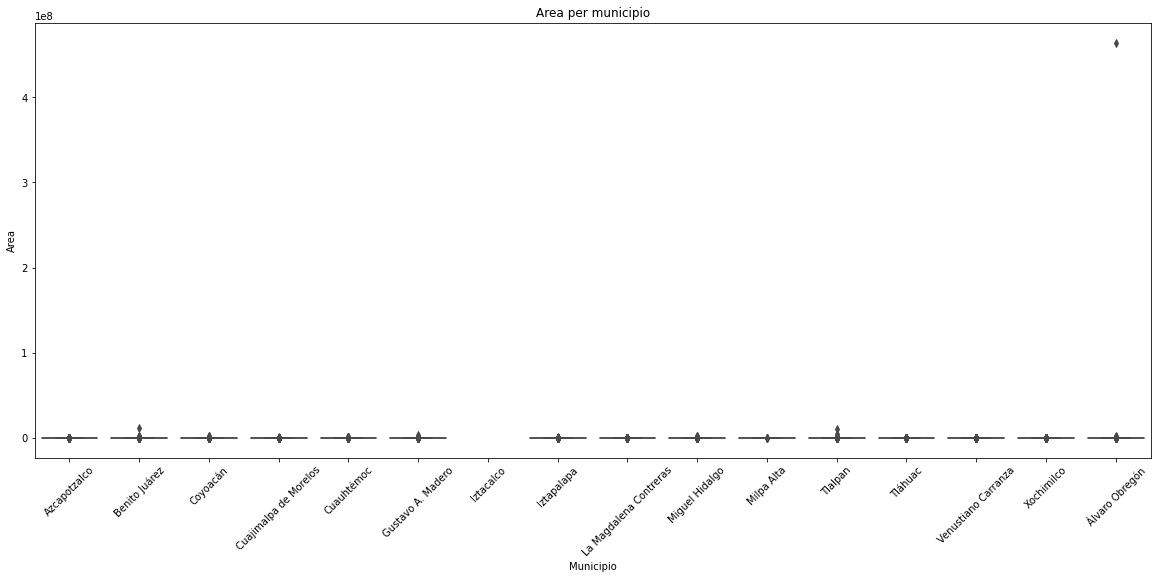

In [56]:
ax=sns.boxplot(data=df, y='num_supconstruida', palette='deep', x='des_municipio')
ax.set(title="Area per municipio",
            ylabel='Area',
            xlabel='Municipio')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.figure.set_size_inches(20,8)

Seems like we need to remove some data

In [57]:
q1, q3 = np.percentile(df['num_supconstruida'].dropna(), [25,75]) #1st and 3rd quartile
q1, q3

(76.0, 270.0)

In [58]:
iqr = q3 - q1

lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
lower_bound, upper_bound

(-215.0, 561.0)

In [59]:
supconstruida_filter = (df['num_supconstruida'] > 0)&(df['num_supconstruida'] < upper_bound)
#area is always positive 

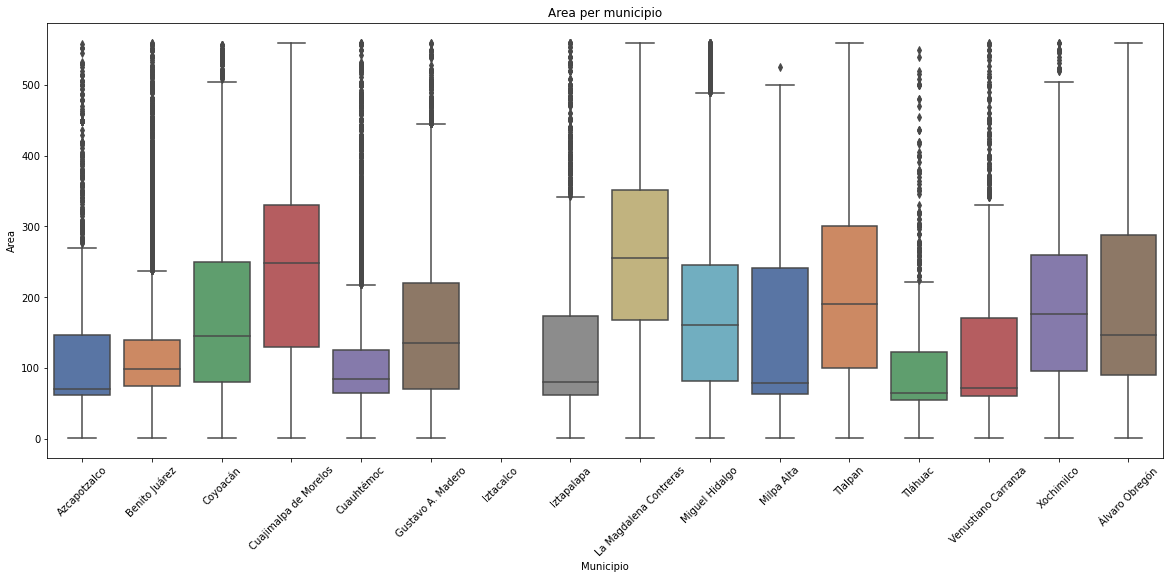

In [60]:
ax=sns.boxplot(y='num_supconstruida', 
               palette='deep', 
               x='des_municipio',
              data=df.loc[supconstruida_filter,:])
ax.set(title="Area per municipio",
            ylabel='Area',
            xlabel='Municipio')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.figure.set_size_inches(20,8)

It seems like we still have a lot of outliers but this is probably due to that we're comparing apartment prices with house prices, etc. 


I've already removed the age outliers so now i'll focus on the prices outliers.

In [61]:
df['des_tipologia'].value_counts()

Departamento    79388
Casa            37298
Terreno          5873
Oficina          2066
Local            1863
Oficinas         1139
Edificio          709
Nave              458
Bodegas           261
Ranchos            25
Name: des_tipologia, dtype: int64

In [62]:
df['des_municipio'].value_counts()

Benito Juárez             23263
Miguel Hidalgo            20619
Álvaro Obregón            16609
Cuauhtémoc                16116
Cuajimalpa de Morelos     10263
Coyoacán                   9298
Tlalpan                    8075
Gustavo A. Madero          6064
Iztapalapa                 5920
Azcapotzalco               3694
Venustiano Carranza        3394
La Magdalena Contreras     2974
Xochimilco                 1710
Tláhuac                    1010
Milpa Alta                   71
Iztacalco                     0
Name: des_municipio, dtype: int64

In [63]:
df.loc[:, 'des_tipologia'].value_counts()

Departamento    79388
Casa            37298
Terreno          5873
Oficina          2066
Local            1863
Oficinas         1139
Edificio          709
Nave              458
Bodegas           261
Ranchos            25
Name: des_tipologia, dtype: int64

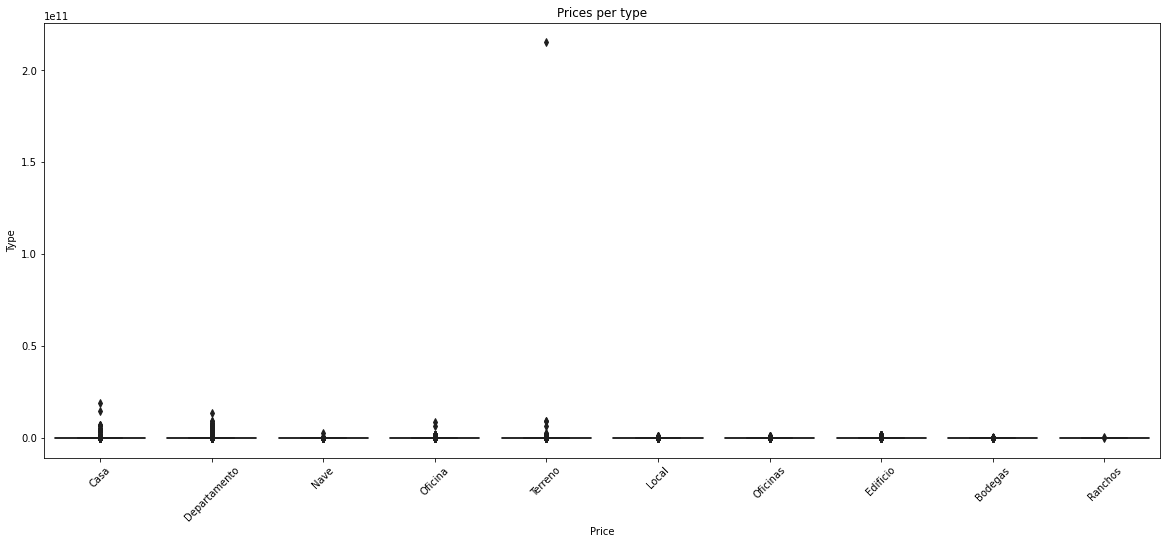

In [64]:
ax=sns.boxplot(y='num_precioventa', 
               palette='dark', 
               x='des_tipologia',
              data=df)
ax.set(title="Prices per type",
            ylabel='Type',
            xlabel='Price')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.figure.set_size_inches(20,8)

We have outliers here too, we'll use the same method to detect them but this time we'll detect them for each tipologia.

In [65]:
df.sort_values('num_precioventa').head()

,index,cod_tipoinmueble,cod_portalinmo,des_tipoanunciante,des_nomanunciante,fec_publicacion,des_municipio,des_distritozona,des_direccion,des_nombrevia,...,num_supconstruida,num_supparcela,des_estadoobra,des_estadoconserv,fec_antiguedad,ind_aparcamiento,num_aparcamiento,ind_vigilancia,num_precioventa,num_preciouniventa
87274,101358,4,2,Agencia,PI Promotores Inmobiliarios,2019-02-05,Miguel Hidalgo,Lomas de Chapultepec,"México, Ciudad de México, Ciudad de México, Mi...",NaN,...,870.0,NaN,Segunda mano,NaN,2001.0,Si,20.0,NaN,1.0,0.0
62323,70827,1,2,Agencia,PI Promotores Inmobiliarios,2018-07-17,Miguel Hidalgo,Polanco,"México, 11550, Miguel Hidalgo, Polanco Nb",NaN,...,180.0,NaN,Segunda mano,NaN,2004.0,Si,2.0,NaN,1.0,0.0
44337,49219,6,1,Agencia,Inmobiliaria Jorge Gonzalez,2017-04-05,Benito Juárez,Narvarte,Uxmal Narvarte Benito Juárez,Uxmal,...,1.0,1.0,Segunda mano,NaN,2018.0,NaN,0.0,NaN,1.0,1.0
44338,49220,6,1,Agencia,Inmobiliaria Jorge Gonzalez,2017-04-05,Álvaro Obregón,Las Aguilas,Calz. de las Aguilas Las Aguilas Alvaro Obregón,Calz. de las Aguilas,...,1.0,1.0,Segunda mano,NaN,2018.0,NaN,0.0,NaN,1.0,1.0
101350,122435,1,3,Particular,Rosy,2019-09-19,Miguel Hidalgo,Bosque De Chapultepec,"Tennyson 352, Bosque De Chapultepec, Miguel Hi...",NaN,...,150.0,150.0,NaN,NaN,2004.0,Si,2.0,NaN,1.0,0.0


In [66]:
tipologia = df.loc[:, 'des_tipologia'].unique()
tipologia



for i in range(0, len(tipologia)):
    q1, q3 = np.percentile(df[df['des_tipologia'] == tipologia[i]]['num_precioventa'].dropna(), [25,75]) 
    iqr = q3 - q1
    upper_bound = q3 + (3*iqr)
    df = df[(df['num_precioventa'] > 35000)&(df['num_precioventa'] < upper_bound)]
    

In [67]:
df.shape

(117626, 29)

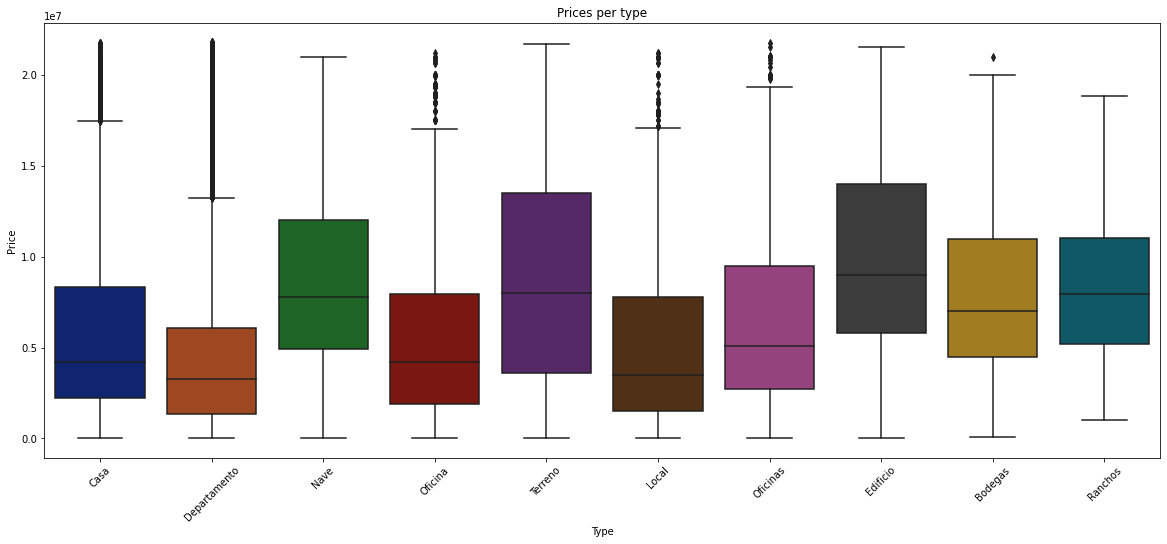

In [68]:
ax=sns.boxplot(y='num_precioventa', 
               palette='dark', 
               x='des_tipologia',
              data=df)
ax.set(title="Prices per type",
            ylabel='Price',
            xlabel='Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.figure.set_size_inches(20,8)

In [69]:
df[df['des_tipologia']=='Departamento'].sort_values('num_precioventa', ascending=False).head()

,index,cod_tipoinmueble,cod_portalinmo,des_tipoanunciante,des_nomanunciante,fec_publicacion,des_municipio,des_distritozona,des_direccion,des_nombrevia,...,num_supconstruida,num_supparcela,des_estadoobra,des_estadoconserv,fec_antiguedad,ind_aparcamiento,num_aparcamiento,ind_vigilancia,num_precioventa,num_preciouniventa
23707,26339,1,1,Agencia,Grupo Encontrandomilugar SA de CV,2019-10-05,Álvaro Obregón,San Mateo Tlaltenango,Av de los Poetas San Mateo Tlaltenango Cuajima...,Av de los Poetas,...,290.0,290.0,Segunda mano,NaN,2019.0,Si,4.0,Si,21775795.0,75089.0
66780,76116,1,2,Agencia,CITYMAX MÉXICO,2019-08-13,Cuajimalpa de Morelos,San Mateo Tlaltenango,NaN,NaN,...,347.0,NaN,Segunda mano,NaN,2019.0,Si,4.0,NaN,21775795.0,62754.0
71871,82777,1,2,Agencia,Encontrandomilugar (591789),2018-08-06,Álvaro Obregón,Santa Fe,"México, Ciudad de México, Ciudad de México, 05...",NaN,...,290.0,NaN,Segunda mano,NaN,2009.0,Si,4.0,Si,21775795.0,75089.0
38801,43059,1,1,Agencia,Grupo Encontrandomilugar SA de CV,2019-08-22,Álvaro Obregón,Departamento en Venta en Ejido San Mateo,Av. de los Poetas #1 Alvaro Obregón Distrito F...,Av. de los Poetas #1,...,290.0,NaN,NaN,NaN,2009.0,Si,4.0,NaN,21775795.0,75089.0
27868,30730,1,1,Agencia,AL,2019-04-17,Miguel Hidalgo,Polanco,Polanco Miguel Hidalgo,NaN,...,NaN,NaN,A estrenar,NaN,2019.0,Si,3.0,Si,21715000.0,NaN


Some of these values don't seem to crazy so there's no need to remove them.

Now we'll focuns only on apartments.

In [70]:
df_apartments = df.loc[df['des_tipologia']=='Departamento']

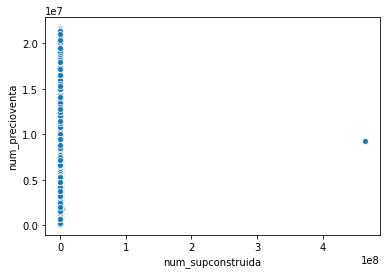

In [71]:
ax = sns.scatterplot(x='num_supconstruida',
                     y='num_precioventa',
                    data=df_apartments)

In [72]:
df_apartments.nlargest(5, 'num_supconstruida')

,index,cod_tipoinmueble,cod_portalinmo,des_tipoanunciante,des_nomanunciante,fec_publicacion,des_municipio,des_distritozona,des_direccion,des_nombrevia,...,num_supconstruida,num_supparcela,des_estadoobra,des_estadoconserv,fec_antiguedad,ind_aparcamiento,num_aparcamiento,ind_vigilancia,num_precioventa,num_preciouniventa
128164,164209,1,4,Particular,Particular,NaN,Álvaro Obregón,NaN,"Ciudad De México, Distrito Federal",NaN,...,464200000.0,NaN,Segunda mano,Excelente,2009.0,NaN,NaN,Si,9300000.0,0.0
126124,160320,1,4,Agencia,Consultores Especializados en Remates Hipoteca...,NaN,Miguel Hidalgo,Miguel Hidalgo,"Colonia Anahuac I Sección, Miguel Hidalgo, Dis...",NaN,...,1960000.0,NaN,Segunda mano,Excelente,2004.0,NaN,NaN,NaN,1960000.0,1.0
125737,159642,1,4,Agencia,Consultores Especializados en Remates Hipoteca...,NaN,Coyoacán,Coyoacán,"Presidentes Ejidales, Coyoacán, Distrito Federal",NaN,...,1300000.0,NaN,Segunda mano,Excelente,2001.0,NaN,NaN,NaN,1300000.0,1.0
125749,159664,1,4,Agencia,Auri Desarrollos,NaN,Benito Juárez,Benito Juárez,"Del Valle, Benito Juárez, Distrito Federal",NaN,...,1252204.0,NaN,Segunda mano,NaN,2004.0,Si,1.0,Si,6456500.0,5.0
125263,158737,1,4,Agencia,Consultores S. G. 13,NaN,Coyoacán,Coyoacán,"Coyoacán, Distrito Federal",NaN,...,1231000.0,NaN,Segunda mano,Bueno,2001.0,NaN,NaN,NaN,1231000.0,1.0


In [73]:
q1, q3 = np.percentile(df_apartments['num_supconstruida'].dropna(), [25,75]) #
iqr = q3 - q1

upper_bound = q3 + (1.5*iqr)

df_apartments = df_apartments.loc[df_apartments['num_supconstruida']<upper_bound]

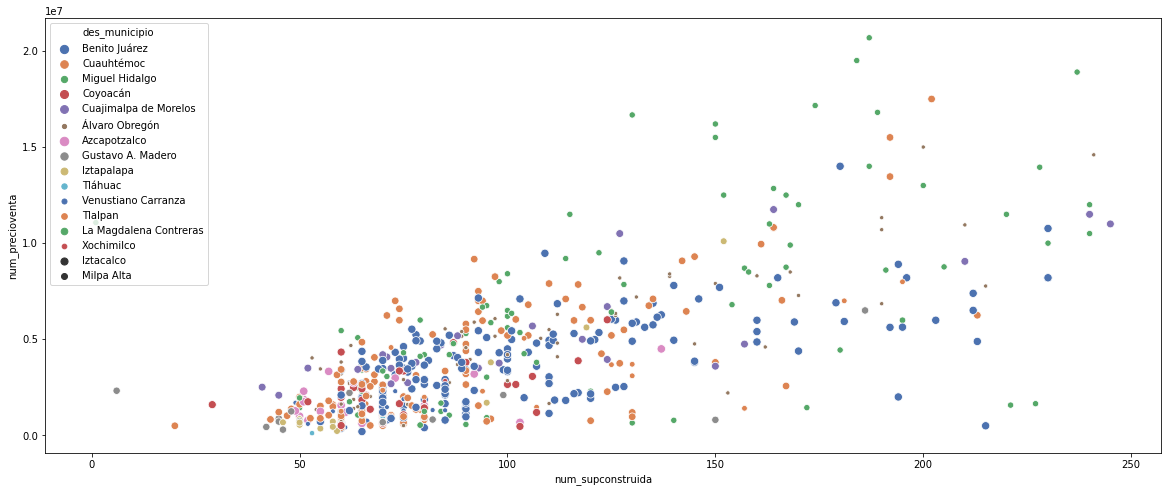

In [74]:
df_sample = df_apartments.sample(frac=0.01)
ax = sns.scatterplot(x='num_supconstruida',
                     y='num_precioventa',
                    data=df_sample,
                    hue='des_municipio',
                    palette='deep',
                    alpha=1,
                    size='des_municipio')
ax.figure.set_size_inches(20,8)

There seems to be some positive correlation between the variables.

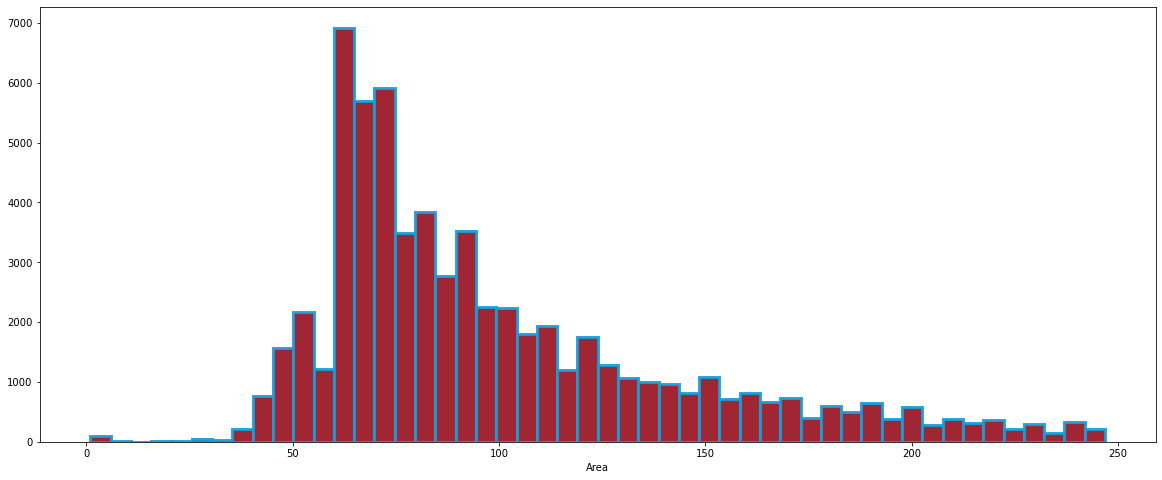

In [75]:
ax = sns.distplot(df_apartments['num_supconstruida'], 
                    kde=False, 
                    bins=50,
                    axlabel='Area',
                    hist_kws= {'color':'#960e1d', 
                                'edgecolor':'#14a0dc',
                                'linewidth':3,
                                'linestyle':'-',
                                'alpha':0.9})
ax.figure.set_size_inches(20,8)
plt.show()

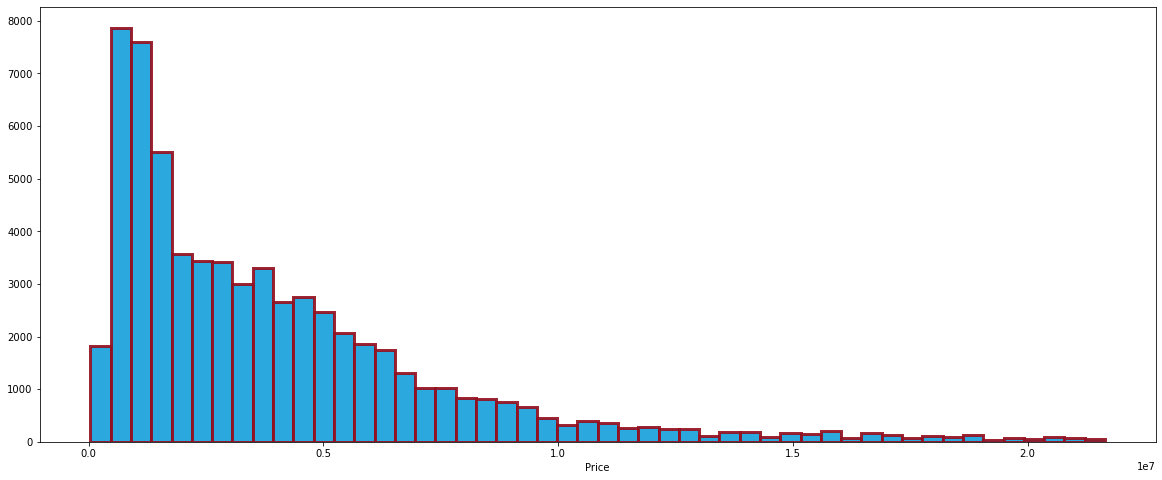

In [76]:
ax = sns.distplot(df_apartments['num_precioventa'], 
                    kde=False, 
                    bins=50,
                    axlabel='Price',
                    hist_kws= {'color':'#14a0dc', 
                                'edgecolor':'#960e1d',
                                'linewidth':3,
                                'linestyle':'-',
                                'alpha':0.9})
ax.figure.set_size_inches(20,8)
plt.show()

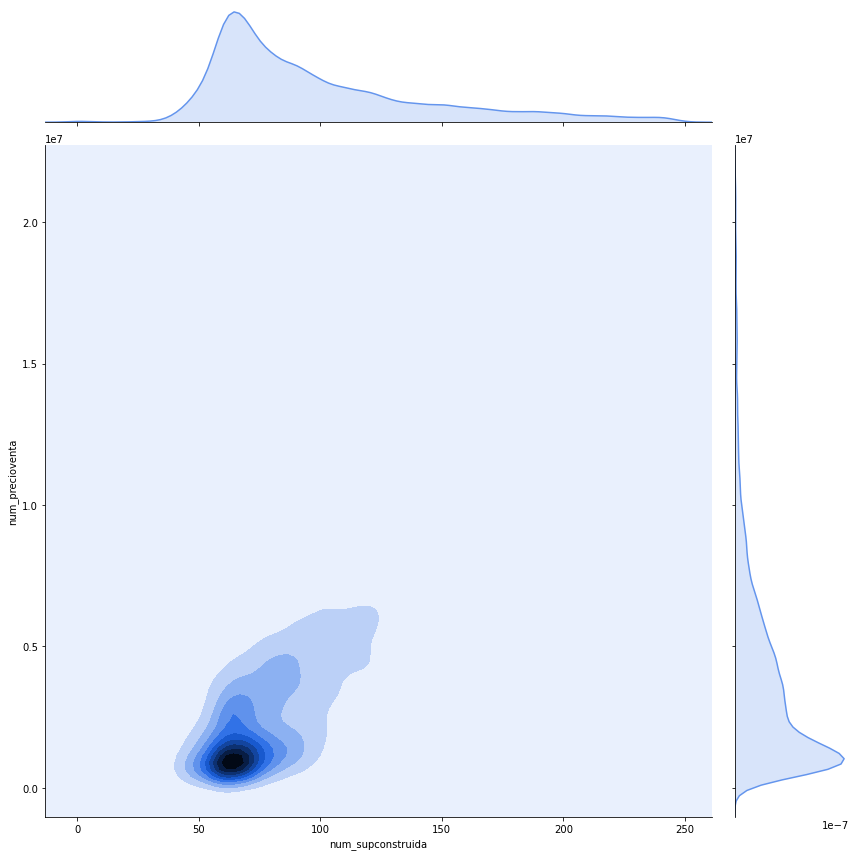

In [77]:
ax = sns.jointplot(x="num_supconstruida",
                    y="num_precioventa",
                    data=df_apartments, 
                    kind="kde",
                    height=12,
                    color='cornflowerblue',
                    dropna=True)
plt.show()

Most of the apartments seem to be on the cheaper side and not that big but neither too small.

Now we'll check the age and the location of the apartments.

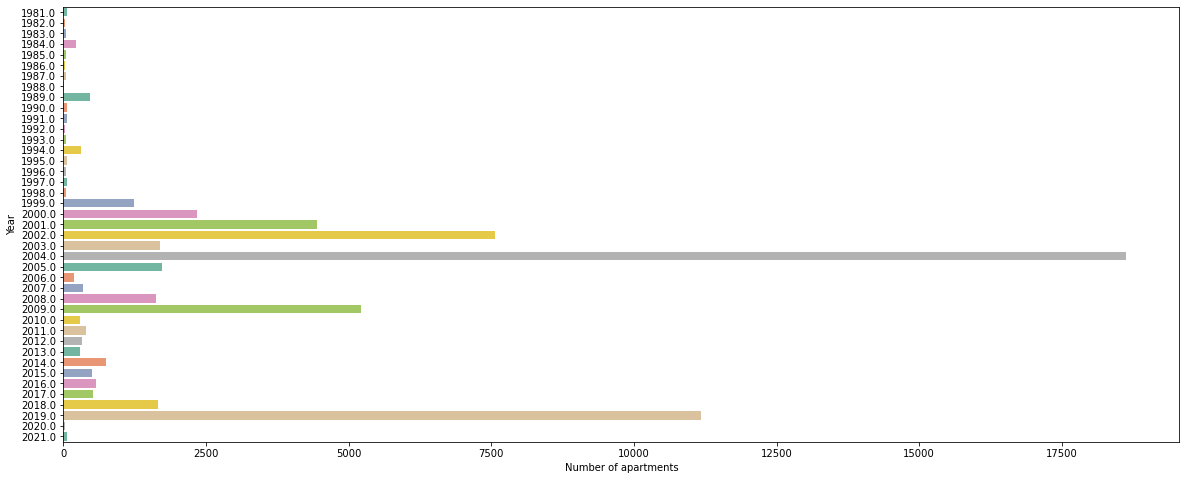

In [78]:
ax = sns.countplot(y='fec_antiguedad',
                   data=df_apartments[df_apartments['fec_antiguedad']>1980],
                   palette='Set2')
ax.set(ylabel='Year', xlabel='Number of apartments')
ax.figure.set_size_inches(20, 8)
plt.show()

There are a lot of apartments from 2014 but that's probably due to that we filled a lot of missing values.

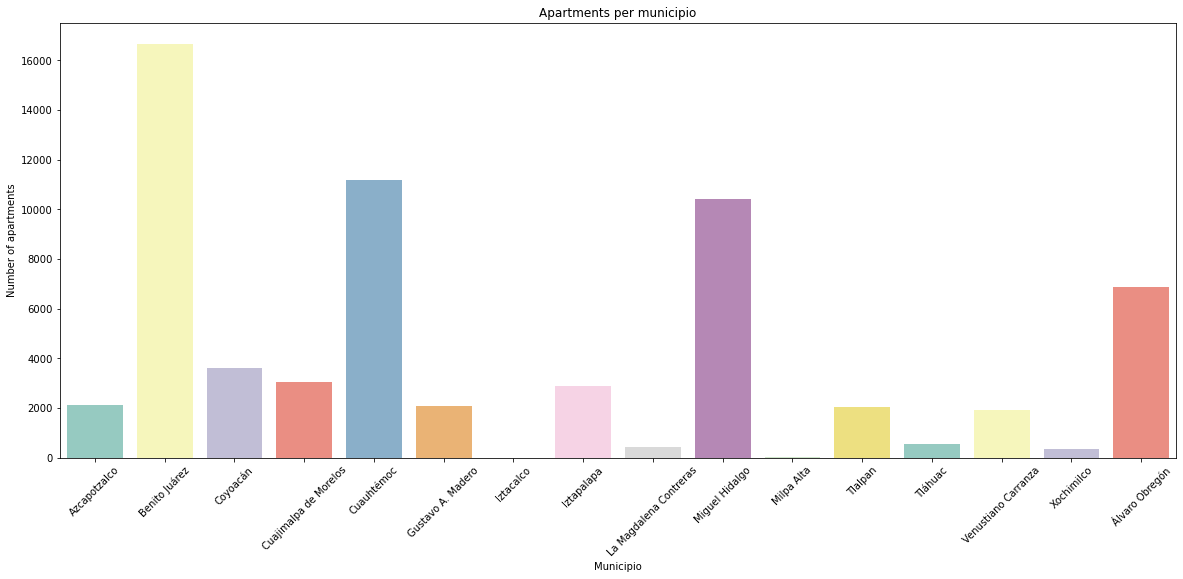

In [79]:
ax = sns.countplot(x='des_municipio',
                   data=df_apartments,
                   palette='Set3')
ax.set(ylabel='Number of apartments',
       xlabel='Municipio',
       title='Apartments per municipio')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.figure.set_size_inches(20, 8)
plt.show()

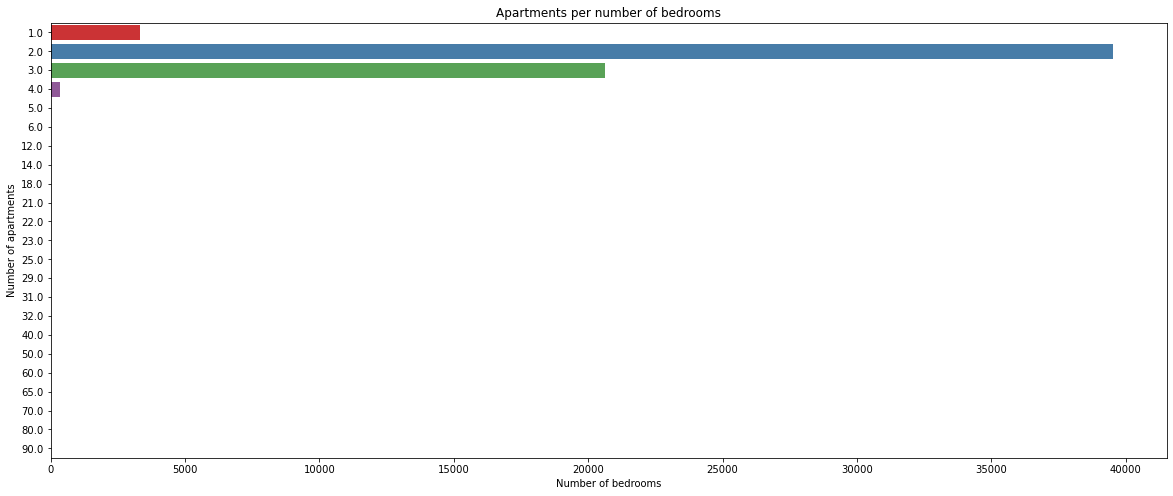

In [80]:
ax = sns.countplot(y='num_dormitorios',
                   data=df_apartments,
                   palette='Set1')
ax.set(ylabel='Number of apartments',
       xlabel='Number of bedrooms',
       title='Apartments per number of bedrooms')
ax.figure.set_size_inches(20, 8)
plt.show()

In [81]:
df_apartments = df_apartments[df_apartments['num_dormitorios'] < 10]

We have some apartments with more than 10 bedrooms, I've never seen and apartmen with more than a few bedrooms so that seems super weird, we'll drop them

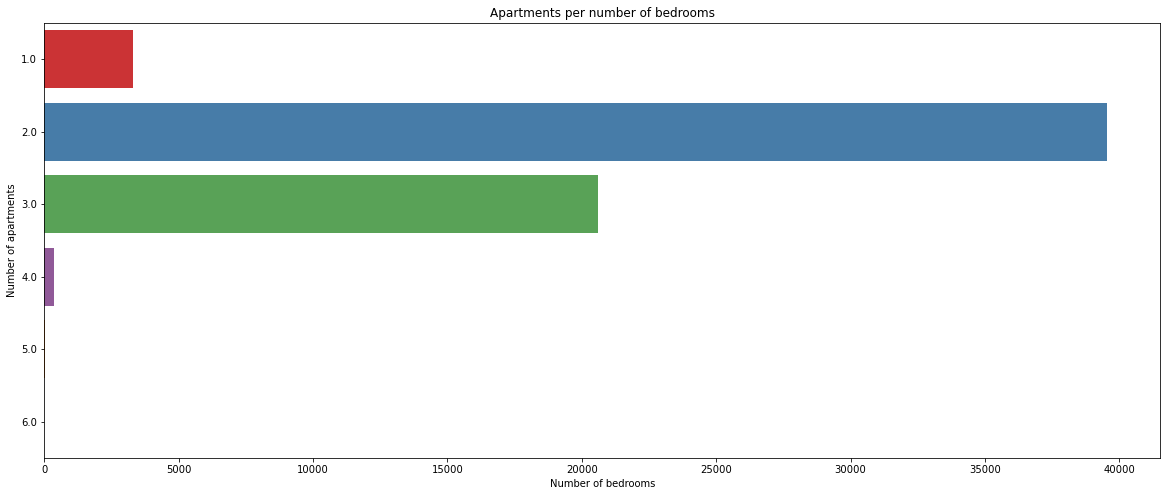

In [82]:
ax = sns.countplot(y='num_dormitorios',
                   data=df_apartments,
                   palette='Set1')
ax.set(ylabel='Number of apartments',
       xlabel='Number of bedrooms',
       title='Apartments per number of bedrooms')
ax.figure.set_size_inches(20, 8)
plt.show()

We can plot the mean price for number of bedrooms. Seems strange that 4 bedrooms apartments are more expensive than 5 bedrooms apartments.

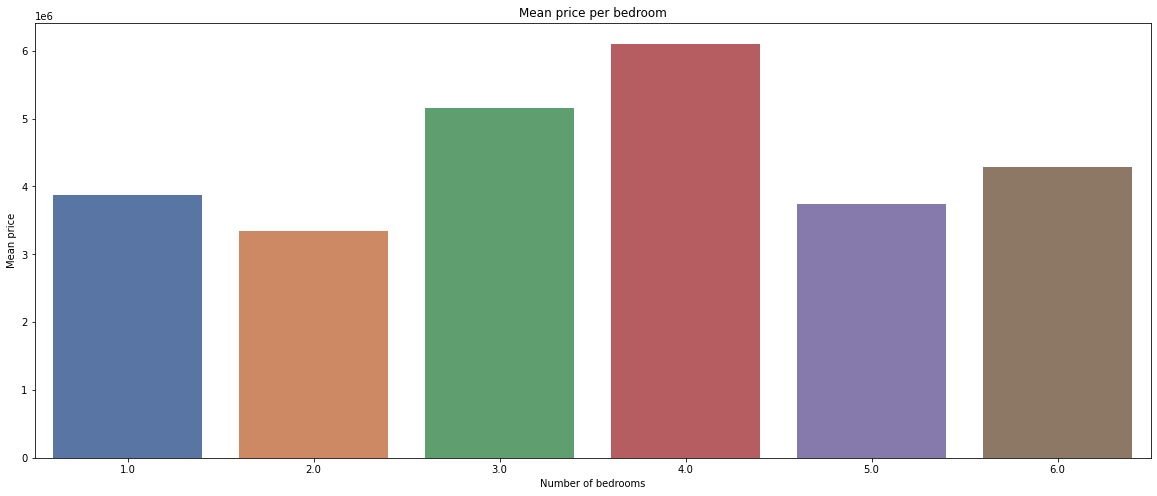

In [83]:
ax =sns.barplot(x=df_apartments.groupby(['num_dormitorios']).mean().index,
               y=df_apartments.groupby(['num_dormitorios']).mean()['num_precioventa'],
               palette='deep')
ax.figure.set_size_inches(20, 8)
ax.set(xlabel='Number of bedrooms',
      ylabel='Mean price',
      title='Mean price per bedroom')
plt.show()

In [84]:
df_apartments.des_estadoobra.value_counts()

Segunda mano    39787
A estrenar       5754
Name: des_estadoobra, dtype: int64

No need to plot only two bars.

We can make the next plot with geopandas but i had some technical issues.

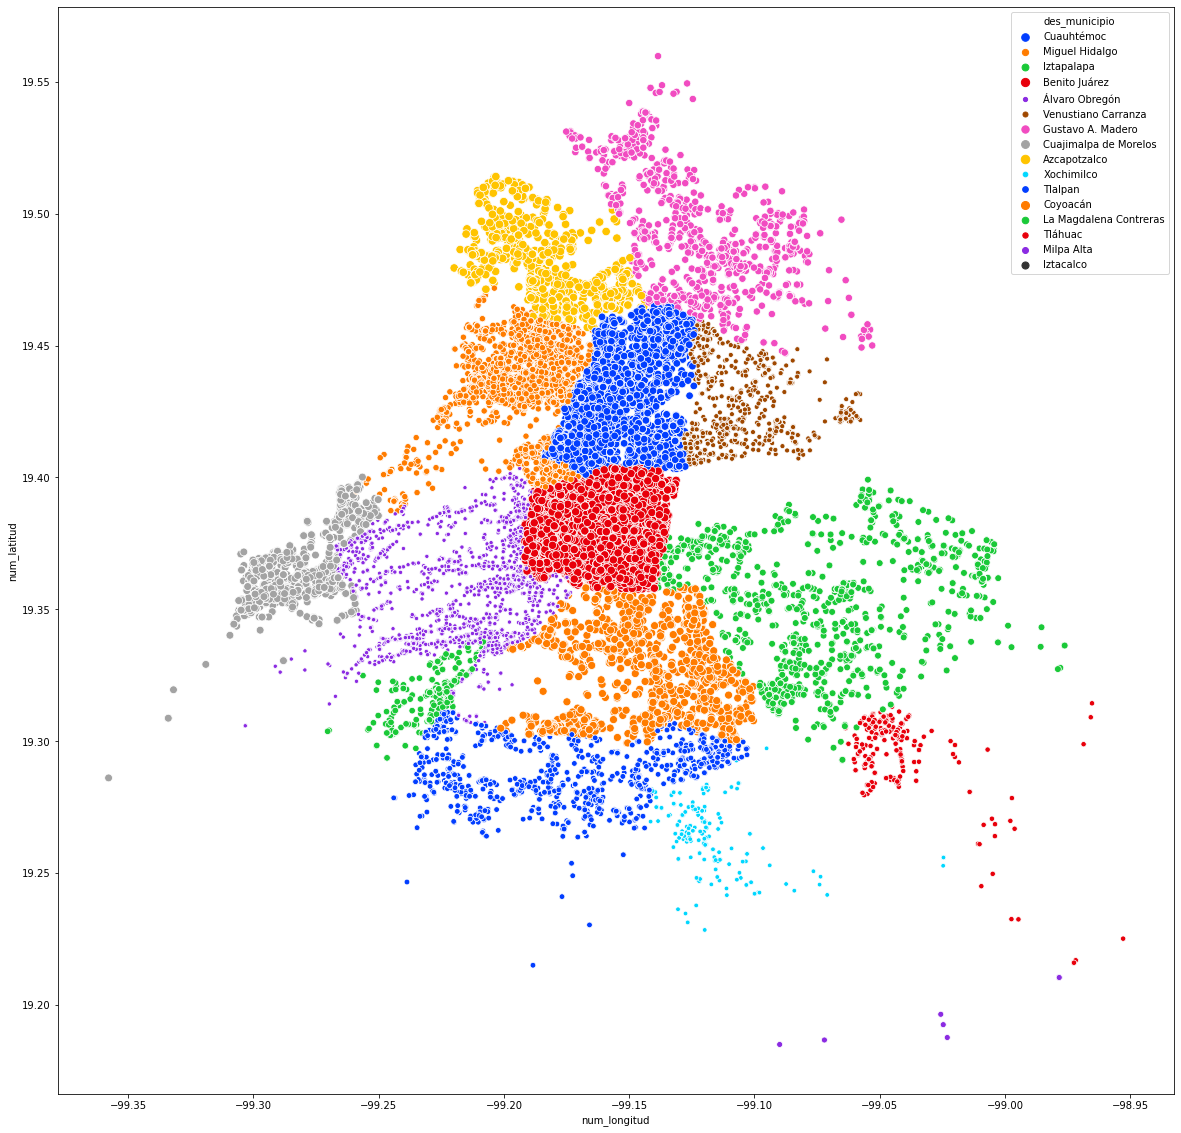

In [85]:
df_sample = df_apartments.sample(frac=1)
ax = sns.scatterplot(x='num_longitud',
                     y='num_latitud',
                    data=df_sample,
                    hue='des_municipio',
                    palette='bright',
                    alpha=1,
                    size='des_municipio')
ax.figure.set_size_inches(20,20)

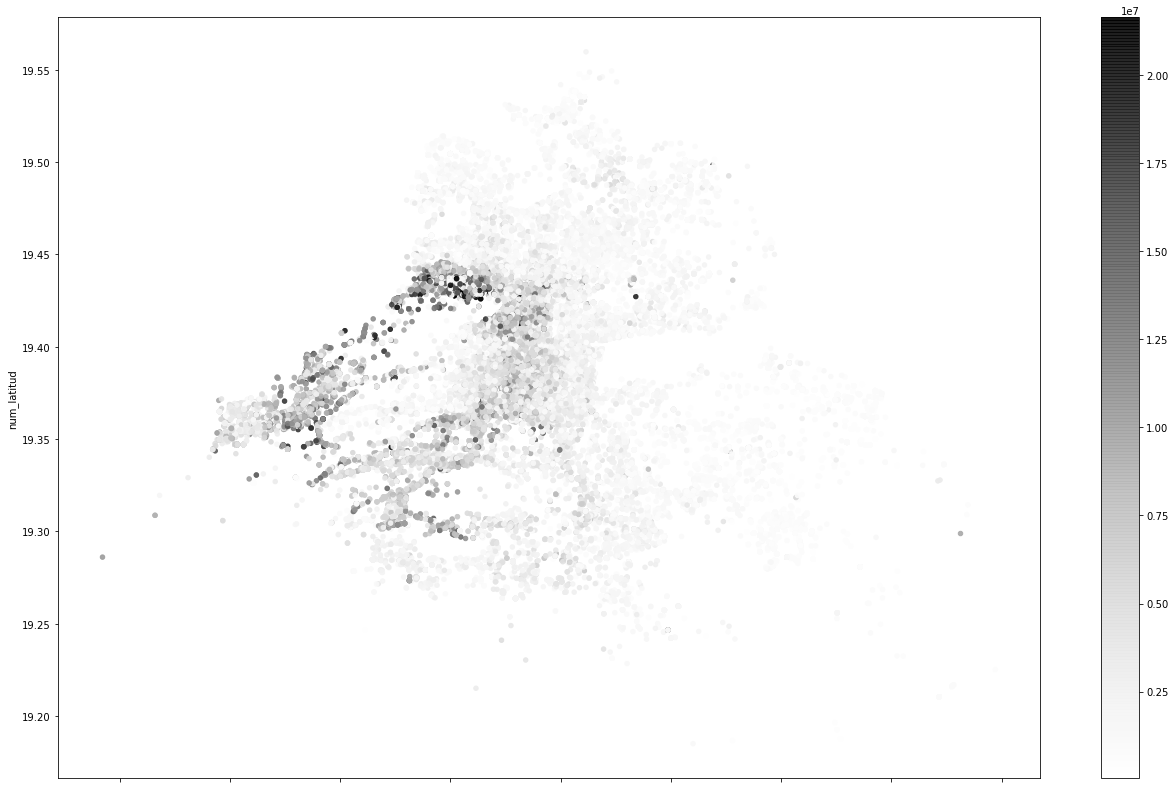

In [100]:
df_sample.plot(kind='scatter',
       x='num_longitud',
       y='num_latitud',
       alpha=0.9,
       c=df_sample['num_precioventa'],
       colorbar=True,
       figsize=(22, 14))
plt.show()

Seems like there are parts of the city where there is no data of apartments for sale.

There are a lot of neighborhoods with only one apartment for sale, so we'll only use the top 50 neighborhoods with the most apartments for sale.

In [101]:
colonias = list(df_apartments['des_distritozona'].value_counts().head(50).index)

In [102]:
df_apartments[df_apartments.des_distritozona.isin(colonias)].groupby(['des_distritozona' ]).mean().nlargest(10, 'num_precioventa')['num_precioventa']

des_distritozona
Polanco                9.661359e+06
Santa Fe Cuajimalpa    8.172223e+06
Condesa                7.772278e+06
Ampliación Granada     7.411037e+06
Santa Fe               6.385049e+06
Granada                6.341819e+06
Roma                   6.219171e+06
Hipódromo              5.763770e+06
Los Alpes              5.485756e+06
Anzures                5.485069e+06
Name: num_precioventa, dtype: float64

In [103]:
df_apartments[df_apartments.des_distritozona.isin(colonias)].groupby(['des_distritozona' ]).mean().nsmallest(10, 'num_precioventa')['num_precioventa']

des_distritozona
Guerrero                 9.258659e+05
Venustiano Carranza      1.140817e+06
Peralvillo               1.195178e+06
Doctores                 1.330095e+06
Transito                 1.389774e+06
Paseos de Taxqueña       1.729084e+06
Moderna                  1.869050e+06
Popotla                  1.967909e+06
Álamos                   2.000480e+06
Santa Maria La Ribera    2.089430e+06
Name: num_precioventa, dtype: float64

Now the top neighborhoods with the highest standard deviation

In [104]:
df_apartments[df_apartments.des_distritozona.isin(colonias)].groupby(['des_distritozona' ]).std().nlargest(10, 'num_precioventa')['num_precioventa']

des_distritozona
Polanco                6.708940e+06
Miguel Hidalgo         5.648965e+06
Santa Fe Cuajimalpa    3.550338e+06
Granada                3.536155e+06
Juárez                 3.468202e+06
Condesa                3.419885e+06
Hipódromo              3.412395e+06
Santa Fe               3.271629e+06
Roma Norte             3.145310e+06
Ampliación Granada     3.094387e+06
Name: num_precioventa, dtype: float64

In [105]:
df_apartments.isnull().sum()

index                     0
cod_tipoinmueble          0
cod_portalinmo            0
des_tipoanunciante        2
des_nomanunciante       123
fec_publicacion        7064
des_municipio             0
des_distritozona       6319
des_direccion          4604
des_nombrevia         44316
des_puerta            55126
num_latitud               0
num_longitud              0
des_tipologia             0
num_dormitorios           0
ind_banos               702
num_banos               702
ind_aseos             58480
num_aseos             53187
num_supconstruida         0
num_supparcela        42195
des_estadoobra        18325
des_estadoconserv     56547
fec_antiguedad           14
ind_aparcamiento      11862
num_aparcamiento       7982
ind_vigilancia        47222
num_precioventa           0
num_preciouniventa        0
dtype: int64

In [106]:
df_apartments_final = df_apartments.loc[:, ['num_latitud',            #Select all these columns 
                                    'num_longitud',             #for the final apartment
                                    'num_precioventa',          #dataset
                                    'des_estadoobra',
                                    'num_dormitorios',
                                    'des_distritozona',
                                    'fec_antiguedad',
                                    'num_supconstruida',
                                    'des_tipoanunciante',
                                    'num_banos',
                                    'num_aparcamiento']]



If we had a more detailed geodataframe i'd only pick num_longitud and num_latitud instead of num_longitud, num_latitud and des_distritozona. Didn't include desmunicipio because num_longitud and num_latitud are included. Also the other picks were based on missing values and what seems important.

In [107]:
df_benito = df_apartments.loc[df['des_municipio']=='Benito Juárez']
df_benito.shape

(16611, 29)

In [108]:
df_benito.head()

,index,cod_tipoinmueble,cod_portalinmo,des_tipoanunciante,des_nomanunciante,fec_publicacion,des_municipio,des_distritozona,des_direccion,des_nombrevia,...,num_supconstruida,num_supparcela,des_estadoobra,des_estadoconserv,fec_antiguedad,ind_aparcamiento,num_aparcamiento,ind_vigilancia,num_precioventa,num_preciouniventa
14018,16028,1,1,Agencia,zonahogares.com,2019-10-05,Benito Juárez,Narvarte,Narvarte Narvarte Benito Juárez,Narvarte,...,179.0,106.0,A estrenar,Excelente,2019.0,Si,2.0,Si,6899999.0,38548.0
14033,16043,1,1,Agencia,PLUSVALIA BIENES RAICES,2019-10-05,Benito Juárez,Del Valle,AV. EUGENIA Del Valle Benito Juárez,AV. EUGENIA,...,97.0,119.0,A estrenar,Excelente,2019.0,Si,1.0,Si,733900.0,7566.0
14035,16045,1,1,Agencia,Mary Paz Martínez Vargas,2019-10-05,Benito Juárez,Portales,EMILIANO ZAPATA 75 Portales Benito Juárez,EMILIANO ZAPATA 75,...,74.0,74.0,A estrenar,Excelente,2019.0,Si,1.0,Si,3514000.0,47487.0
14036,16046,1,1,Agencia,Mary Paz Martínez Vargas,2019-10-05,Benito Juárez,Portales,EMILIANO ZAPATA 75 Portales Benito Juárez,EMILIANO ZAPATA 75,...,69.0,69.0,A estrenar,Excelente,2019.0,Si,1.0,Si,3281000.0,47551.0
14037,16047,1,1,Agencia,Natalia Macias,2019-10-05,Benito Juárez,Napoles,Oklahoma Napoles Benito Juárez,Oklahoma,...,130.0,130.0,Segunda mano,NaN,2016.0,Si,2.0,Si,6100000.0,46924.0


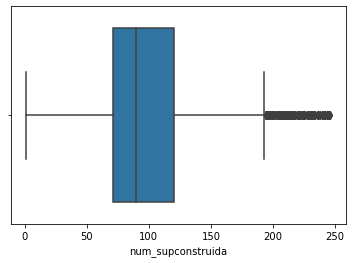

In [109]:
ax = sns.boxplot(x=df_benito['num_supconstruida'])

In [110]:
df_benito['bin'] = pd.qcut(df_benito['num_supconstruida'],
                           q=50, 
                           duplicates='drop')
df_benito['bin'].value_counts()

<ipython-input-110-7f2900c8220a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_benito['bin'] = pd.qcut(df_benito['num_supconstruida'],


(68.0, 70.0]      1039
(54.0, 60.0]       972
(64.0, 65.0]       860
(79.0, 80.0]       781
(72.0, 75.0]       742
(82.0, 85.0]       703
(89.0, 90.0]       682
(107.0, 110.0]     497
(98.0, 100.0]      489
(95.0, 98.0]       452
(101.0, 105.0]     426
(118.0, 120.0]     421
(61.0, 64.0]       399
(111.0, 115.0]     383
(130.0, 136.0]     376
(136.0, 140.0]     350
(90.0, 93.0]       344
(93.0, 95.0]       344
(0.999, 54.0]      343
(146.0, 154.0]     341
(123.0, 127.0]     339
(185.0, 209.0]     336
(77.0, 79.0]       335
(154.0, 163.0]     332
(172.0, 185.0]     330
(209.0, 246.0]     327
(115.0, 118.0]     320
(85.0, 87.0]       318
(163.0, 172.0]     308
(66.0, 68.0]       300
(127.0, 130.0]     295
(75.0, 77.0]       291
(105.0, 107.0]     285
(140.0, 146.0]     262
(70.0, 72.0]       262
(87.0, 89.0]       252
(120.0, 123.0]     246
(80.0, 82.0]       228
(65.0, 66.0]        92
(110.0, 111.0]      87
(100.0, 101.0]      64
(60.0, 61.0]        58
Name: bin, dtype: int64

In [111]:
df_benito.groupby(['bin', 'num_dormitorios']).count().nlargest(5, 'index')

,,index,cod_tipoinmueble,cod_portalinmo,des_tipoanunciante,des_nomanunciante,fec_publicacion,des_municipio,des_distritozona,des_direccion,des_nombrevia,...,num_supconstruida,num_supparcela,des_estadoobra,des_estadoconserv,fec_antiguedad,ind_aparcamiento,num_aparcamiento,ind_vigilancia,num_precioventa,num_preciouniventa
bin,num_dormitorios,,,,,,,,,,,,,,,,,,,,,
"(68.0, 70.0]",2.0,884.0,884.0,884.0,884.0,883.0,765.0,884.0,826.0,813.0,221.0,...,884.0,237.0,662.0,88.0,884.0,733.0,776.0,160.0,884.0,884.0
"(54.0, 60.0]",2.0,858.0,858.0,858.0,858.0,857.0,744.0,858.0,807.0,787.0,236.0,...,858.0,192.0,670.0,89.0,858.0,636.0,737.0,110.0,858.0,858.0
"(64.0, 65.0]",2.0,775.0,775.0,775.0,775.0,775.0,712.0,775.0,610.0,547.0,162.0,...,775.0,198.0,597.0,62.0,775.0,651.0,694.0,152.0,775.0,775.0
"(72.0, 75.0]",2.0,598.0,598.0,598.0,598.0,596.0,514.0,598.0,549.0,561.0,170.0,...,598.0,198.0,424.0,68.0,598.0,504.0,521.0,180.0,598.0,598.0
"(82.0, 85.0]",2.0,505.0,505.0,505.0,505.0,504.0,422.0,505.0,466.0,489.0,157.0,...,505.0,159.0,363.0,47.0,505.0,394.0,416.0,152.0,505.0,505.0


So the mort common apartment in Benito Juárez is between 68 m^2 and 70 m^2 and has two bedrooms

In [112]:
df_apartments.nsmallest(5, 'fec_antiguedad')

,index,cod_tipoinmueble,cod_portalinmo,des_tipoanunciante,des_nomanunciante,fec_publicacion,des_municipio,des_distritozona,des_direccion,des_nombrevia,...,num_supconstruida,num_supparcela,des_estadoobra,des_estadoconserv,fec_antiguedad,ind_aparcamiento,num_aparcamiento,ind_vigilancia,num_precioventa,num_preciouniventa
68385,78412,1,2,Agencia,TrueHome,2019-06-07,Miguel Hidalgo,Lomas de Chapultepec,Sierra Gorda,NaN,...,226.0,NaN,Segunda mano,NaN,1881.0,Si,2.0,NaN,8700000.0,38496.0
44968,49926,1,2,Agencia,Alegra Inmobiliaria,2019-08-28,Cuauhtémoc,Área 1,Leandro valle,NaN,...,77.0,NaN,Segunda mano,NaN,1910.0,NaN,0.0,NaN,1550000.0,20130.0
30134,33184,1,1,Agencia,DURAN & ASOCIADOS,2019-06-21,Cuauhtémoc,Roma,Río de Janeiro 56 Roma Cuauhtémoc,Río de Janeiro 56,...,85.0,85.0,Segunda mano,Bueno,1919.0,NaN,0.0,NaN,5500000.0,64706.0
105371,127897,1,3,Agencia,Grupo Aura,2019-07-11,Cuauhtémoc,Centro De La Ciudad De México Area 1,"Echeveste 4, Centro De La Ciudad De México Are...",NaN,...,109.0,109.0,NaN,NaN,1919.0,NaN,NaN,NaN,1849000.0,16963.0
105543,128175,1,3,Particular,Carolina,2019-09-15,Cuauhtémoc,Centro De La Ciudad De México Area 1,"República De Perú 100, Centro De La Ciudad De ...",NaN,...,80.0,80.0,NaN,NaN,1919.0,NaN,NaN,NaN,1850000.0,23125.0


Considering the city is quite old this data is not weird, the des_distritozona of these properties is quite old so this data is probably correct. The properties we removed first, the ones that were from before 1492 are probably typos. Year 1 doesn't make sense at all.

In [113]:
df_2.nsmallest(5, 'fec_antiguedad')['fec_antiguedad']

19442    1.0
24432    1.0
49234    1.0
56237    1.0
57576    1.0
Name: fec_antiguedad, dtype: float64

The cheapest apartments are from expensive parts of the city, they probably missed some 0's when typing the price

In [114]:
df_apartments.nsmallest(5, 'num_precioventa')

,index,cod_tipoinmueble,cod_portalinmo,des_tipoanunciante,des_nomanunciante,fec_publicacion,des_municipio,des_distritozona,des_direccion,des_nombrevia,...,num_supconstruida,num_supparcela,des_estadoobra,des_estadoconserv,fec_antiguedad,ind_aparcamiento,num_aparcamiento,ind_vigilancia,num_precioventa,num_preciouniventa
100934,121694,1,3,Agencia,Tucasahoy,2019-04-30,Miguel Hidalgo,NaN,"Polanco, Miguel Hidalgo, Distrito Federal",NaN,...,145.0,145.0,NaN,NaN,2004.0,Si,1.0,NaN,35500.0,245.0
29143,32121,1,1,Agencia,Rayo Vende,2019-04-02,Álvaro Obregón,San Angel,Departamentos Nuevos EN Venta!! San Angel Alva...,Departamentos Nuevos EN Venta!!,...,121.0,134.0,A estrenar,NaN,2019.0,NaN,0.0,NaN,35971.0,298.0
29490,32494,1,1,Agencia,Rayo Vende,2019-04-02,Benito Juárez,Departamento 202 Gabriel Mancera,Departamento 202 Gabriel Mancera Benito Juárez...,Departamento 202 Gabriel Mancera,...,121.0,134.0,A estrenar,NaN,2019.0,Si,2.0,NaN,35971.0,298.0
33086,36549,1,1,Agencia,Rayo Vende,2019-04-02,Benito Juárez,Departamentos Obra Nueva en Venta del Valle,Departamentos Obra Nueva EN Venta DEL Valle Be...,Departamentos Obra Nueva EN Venta DEL Valle,...,121.0,134.0,A estrenar,NaN,2019.0,NaN,0.0,NaN,35971.0,298.0
52132,58396,1,2,Agencia,Rayo Vende,2019-07-26,Álvaro Obregón,San Angel,NaN,NaN,...,121.0,NaN,Segunda mano,NaN,2019.0,NaN,0.0,NaN,35971.0,297.0


The most expensive are in Polanco as is expected but 4 of the top 5 most expensives are from Rent A House México

In [115]:
df_apartments.nlargest(5, 'num_precioventa')

,index,cod_tipoinmueble,cod_portalinmo,des_tipoanunciante,des_nomanunciante,fec_publicacion,des_municipio,des_distritozona,des_direccion,des_nombrevia,...,num_supconstruida,num_supparcela,des_estadoobra,des_estadoconserv,fec_antiguedad,ind_aparcamiento,num_aparcamiento,ind_vigilancia,num_precioventa,num_preciouniventa
15714,17842,1,1,Agencia,Rent A House México,2019-09-30,Miguel Hidalgo,Polanco,Calle Edgar Allan Poe Polanco Miguel Hidalgo,Calle Edgar Allan Poe,...,208.0,208.0,A estrenar,NaN,2019.0,Si,2.0,Si,21650000.0,104087.0
15184,17281,1,1,Agencia,Rent A House México,2019-10-01,Miguel Hidalgo,Polanco,Calle Edgar Allan Poe Polanco Miguel Hidalgo,Calle Edgar Allan Poe,...,220.0,220.0,A estrenar,NaN,2019.0,Si,2.0,Si,21600000.0,98182.0
18236,20631,1,1,Agencia,Rent A House México,2018-01-03,Miguel Hidalgo,Polanco,Polanco Polanco Miguel Hidalgo,Polanco,...,220.0,220.0,A estrenar,Excelente,2019.0,Si,2.0,Si,21600000.0,98182.0
102906,124548,1,3,Agencia,Mariscalrealestatemexicomar,2019-10-04,Miguel Hidalgo,NaN,"Polanco, Miguel Hidalgo, Distrito Federal",NaN,...,220.0,220.0,NaN,NaN,2004.0,Si,2.0,NaN,21600000.0,98182.0
15586,17708,1,1,Agencia,Rent A House Mexico,2019-10-01,Miguel Hidalgo,Polanco,Polanco Miguel Hidalgo,NaN,...,202.0,NaN,NaN,NaN,2004.0,Si,2.0,NaN,21599000.0,106926.0


There are no 1 m^2 apartments and 4 out of the top 5 are from Catalofo de Inmuebles.

In [116]:
df_apartments.nsmallest(5, 'num_supconstruida')

,index,cod_tipoinmueble,cod_portalinmo,des_tipoanunciante,des_nomanunciante,fec_publicacion,des_municipio,des_distritozona,des_direccion,des_nombrevia,...,num_supconstruida,num_supparcela,des_estadoobra,des_estadoconserv,fec_antiguedad,ind_aparcamiento,num_aparcamiento,ind_vigilancia,num_precioventa,num_preciouniventa
14081,16092,1,1,Agencia,Catalogo de Inmuebles,2019-10-05,Benito Juárez,LetrAn Valle,LETRAN VALLE LetrAn Valle Benito Juárez,LETRAN VALLE,...,1.0,1.0,Segunda mano,NaN,2018.0,Si,2.0,Si,6800000.0,6800000.0
14776,16840,1,1,Agencia,Catalogo de Inmuebles,2019-10-03,Cuauhtémoc,Roma,ROMA Roma Cuauhtémoc,ROMA,...,1.0,1.0,Segunda mano,NaN,2018.0,Si,1.0,Si,8250000.0,8250000.0
16052,18239,1,1,Agencia,SINERGIA-CONSULTORES,2019-09-27,Cuauhtémoc,Hipódromo Condesa,TLAXCALA Hipódromo Condesa Cuauhtémoc,TLAXCALA,...,1.0,132.0,Segunda mano,NaN,2017.0,Si,2.0,Si,1799459.0,1799459.0
17336,19654,1,1,Agencia,Catalogo de Inmuebles,2019-09-21,Álvaro Obregón,Santa Fe Cuajimalpa,SANTA FE CUAJIMALPA Santa Fe Cuajimalpa Cuajim...,SANTA FE CUAJIMALPA,...,1.0,1.0,Segunda mano,NaN,2018.0,Si,3.0,NaN,8500000.0,8500000.0
17397,19723,1,1,Agencia,Catalogo de Inmuebles,2019-09-21,Álvaro Obregón,Guadalupe Inn,GUADALUPE INN ALVARO OBREGON Guadalupe Inn Alv...,"GUADALUPE INN, ALVARO OBREGON",...,1.0,1.0,Segunda mano,NaN,2017.0,Si,2.0,NaN,6750000.0,6750000.0


The biggest ones seem to be ok.

In [117]:
df_apartments.nlargest(5, 'num_supconstruida')

,index,cod_tipoinmueble,cod_portalinmo,des_tipoanunciante,des_nomanunciante,fec_publicacion,des_municipio,des_distritozona,des_direccion,des_nombrevia,...,num_supconstruida,num_supparcela,des_estadoobra,des_estadoconserv,fec_antiguedad,ind_aparcamiento,num_aparcamiento,ind_vigilancia,num_precioventa,num_preciouniventa
109868,134001,1,3,Agencia,Mariaeugeniamirandadesato,2019-09-03,Cuajimalpa de Morelos,Bosques De Las Lomas,"Bosque De Laureles 404, Bosques De Las Lomas, ...",NaN,...,246.81,1000.0,NaN,NaN,2017.0,Si,3.0,NaN,15000000.0,60775.0
16764,19014,1,1,Agencia,Keller Williams Polanco,2019-09-25,Miguel Hidalgo,Polanco,Galileo Polanco Miguel Hidalgo,Galileo,...,246.00,NaN,NaN,NaN,2004.0,NaN,NaN,NaN,1600000.0,6505.0
18473,20876,1,1,Agencia,Coldwell Banker Invest,2017-11-22,Benito Juárez,San José Insurgentes,San José Insurgentes Benito Juárez,NaN,...,246.00,NaN,A estrenar,NaN,2019.0,Si,2.0,NaN,11838450.0,48124.0
21134,23652,1,1,Agencia,REVIVE INMOBILIARIA SAN ANGEL,2019-01-21,Álvaro Obregón,Las Aguilas,MEDANOS Las Aguilas Alvaro Obregón,MEDANOS,...,246.00,NaN,Segunda mano,Excelente,2016.0,Si,5.0,Si,15500000.0,63009.0
22157,24721,1,1,Agencia,SLB BIENES RAÍCES,2018-07-29,Miguel Hidalgo,Polanco,polanco Polanco Miguel Hidalgo,polanco,...,246.00,246.0,A estrenar,NaN,2019.0,Si,2.0,Si,1600000.0,6505.0


In [118]:
df_cuau = df_apartments_final[(df_apartments['des_distritozona']=='Juárez') | #filter 
              (df_apartments['des_distritozona']=='Cuauhtémoc')]

In [119]:
q1, q3 = np.percentile(df_cuau['num_precioventa'].dropna(), [25,75]) #first and third quartile
iqr = q3 - q1

We select the more expensive of the cheapest apartments

In [120]:
df_cuau[(df_cuau['num_precioventa'] < q1) &         #select top 20 of the cheapest
       (df_cuau['des_distritozona']=='Cuauhtémoc')].nlargest(20, 'num_precioventa')

,num_latitud,num_longitud,num_precioventa,des_estadoobra,num_dormitorios,des_distritozona,fec_antiguedad,num_supconstruida,des_tipoanunciante,num_banos,num_aparcamiento
127910,19.436761,-99.138773,1590000.0,Segunda mano,2.0,Cuauhtémoc,2002.0,86.0,Agencia,1.0,NaN
128279,19.457911,-99.144232,1590000.0,Segunda mano,2.0,Cuauhtémoc,2002.0,60.0,Particular,2.0,NaN
128283,19.452369,-99.138415,1590000.0,Segunda mano,2.0,Cuauhtémoc,2002.0,60.0,Particular,2.0,NaN
128302,19.456258,-99.144991,1590000.0,Segunda mano,2.0,Cuauhtémoc,2002.0,60.0,Particular,2.0,NaN
55869,19.442790,-99.144130,1580000.0,Segunda mano,2.0,Cuauhtémoc,2002.0,70.0,Agencia,1.0,0.0
127380,19.456160,-99.126484,1580000.0,Segunda mano,3.0,Cuauhtémoc,2002.0,84.0,Agencia,NaN,1.0
124672,19.434469,-99.163270,1572160.0,Segunda mano,2.0,Cuauhtémoc,2002.0,102.0,Agencia,2.0,NaN
128308,19.452369,-99.138415,1570000.0,Segunda mano,2.0,Cuauhtémoc,2002.0,60.0,Particular,2.0,NaN
33429,19.427754,-99.171109,1560000.0,Segunda mano,3.0,Cuauhtémoc,1999.0,80.0,Agencia,1.0,1.0
49200,19.442790,-99.144130,1560000.0,Segunda mano,2.0,Cuauhtémoc,2002.0,70.0,Agencia,1.0,1.0


In [121]:
df_cuau[(df_cuau['num_precioventa'] < q1) &             #top 20 cheapest
       (df_cuau['des_distritozona']=='Cuauhtémoc')].nsmallest(20, 'num_precioventa')

SyntaxError: invalid character in identifier (<ipython-input-121-2dad38692e32>, line 1)

In [122]:
df_cuau[df.des_distritozona=='Cuauhtémoc'].groupby(['num_dormitorios']).mean()

<ipython-input-122-a4d99e215cfd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cuau[df.des_distritozona=='Cuauhtémoc'].groupby(['num_dormitorios']).mean()


,num_latitud,num_longitud,num_precioventa,fec_antiguedad,num_supconstruida,num_banos,num_aparcamiento
num_dormitorios,,,,,,,
1.0,19.428513,-99.162625,4.097152e+06,2006.320833,67.400000,1.432773,0.835165
2.0,19.428364,-99.156574,3.542713e+06,2004.488778,82.067332,1.582418,1.140655
3.0,19.425033,-99.162245,4.222296e+06,2002.532808,118.753281,1.965116,1.253886
4.0,19.428945,-99.163975,4.389500e+06,1993.000000,137.500000,2.750000,1.333333


If you compare the next apartment with the average 2 bedroom apartment is cheaper and above average on the other columns. After some reparations it could be worth more than double it's original price.

In [123]:
df_cuau.loc[124672]

num_latitud                19.4345
num_longitud              -99.1633
num_precioventa        1.57216e+06
des_estadoobra        Segunda mano
num_dormitorios                  2
des_distritozona        Cuauhtémoc
fec_antiguedad                2002
num_supconstruida              102
des_tipoanunciante         Agencia
num_banos                        2
num_aparcamiento               NaN
Name: 124672, dtype: object

The next apartment is smaller than the 3 bedroom apartment but it's quite cheap.

In [124]:
df_cuau.loc[128078]

num_latitud                19.4468
num_longitud              -99.1595
num_precioventa           1.55e+06
des_estadoobra        Segunda mano
num_dormitorios                  3
des_distritozona        Cuauhtémoc
fec_antiguedad                2002
num_supconstruida               93
des_tipoanunciante         Agencia
num_banos                      NaN
num_aparcamiento               NaN
Name: 128078, dtype: object

The next apartment is a little bit small but it's supper cheap, has 3 bedrooms and has 2 parking lots. The price might be a typo but if it is correct then it might be worth checking out.

In [125]:
df_cuau.loc[72496]

num_latitud                19.4428
num_longitud              -99.1441
num_precioventa             298711
des_estadoobra        Segunda mano
num_dormitorios                  3
des_distritozona        Cuauhtémoc
fec_antiguedad                2002
num_supconstruida               99
des_tipoanunciante         Agencia
num_banos                        1
num_aparcamiento                 2
Name: 72496, dtype: object

Next apartment is super small but it has 3 bedrooms and a parking lot and is super cheap.

In [126]:
df_cuau.loc[68162]

num_latitud                19.4428
num_longitud              -99.1441
num_precioventa             454000
des_estadoobra        Segunda mano
num_dormitorios                  3
des_distritozona        Cuauhtémoc
fec_antiguedad                2002
num_supconstruida               70
des_tipoanunciante         Agencia
num_banos                        1
num_aparcamiento                 1
Name: 68162, dtype: object

Next apartment is quite big compared with the other cheapest ones.

In [127]:
df_cuau.loc[123905]

num_latitud                19.4418
num_longitud              -99.1429
num_precioventa             451102
des_estadoobra        Segunda mano
num_dormitorios                  2
des_distritozona        Cuauhtémoc
fec_antiguedad                2002
num_supconstruida               75
des_tipoanunciante         Agencia
num_banos                        2
num_aparcamiento               NaN
Name: 123905, dtype: object

In [128]:
df_cuau[(df_cuau['num_precioventa'] < q1) &
       (df_cuau['des_distritozona']=='Juárez')].nlargest(20, 'num_precioventa')

,num_latitud,num_longitud,num_precioventa,des_estadoobra,num_dormitorios,des_distritozona,fec_antiguedad,num_supconstruida,des_tipoanunciante,num_banos,num_aparcamiento
31472,19.427117,-99.155496,1549122.0,NaN,2.0,Juárez,2002.0,70.0,Agencia,1.0,NaN
46212,19.426560,-99.154740,1549122.0,Segunda mano,2.0,Juárez,2002.0,70.0,Agencia,1.0,1.0
47686,19.426824,-99.155041,1439922.0,Segunda mano,2.0,Juárez,2002.0,80.0,Particular,1.0,0.0
47139,19.426824,-99.155041,1439893.0,Segunda mano,2.0,Juárez,2002.0,110.0,Agencia,1.0,1.0
52271,19.426824,-99.155041,1439893.0,Segunda mano,2.0,Juárez,2002.0,75.0,Agencia,1.0,0.0
52639,19.426824,-99.155041,1439893.0,Segunda mano,2.0,Juárez,2002.0,60.0,Agencia,1.0,0.0
67841,19.426824,-99.155041,1404000.0,Segunda mano,3.0,Juárez,2002.0,75.0,Agencia,1.0,1.0
53644,19.429340,-99.155180,1403625.0,Segunda mano,2.0,Juárez,2002.0,70.0,Agencia,1.0,1.0
65591,19.429000,-99.155210,1403625.0,Segunda mano,3.0,Juárez,2002.0,90.0,Agencia,2.0,1.0
72062,19.426120,-99.163900,1266848.0,Segunda mano,3.0,Juárez,2002.0,100.0,Agencia,2.0,1.0


In [129]:
df_cuau[(df_cuau['num_precioventa'] < q1) &
       (df_cuau['des_distritozona']=='Juárez')].nsmallest(20, 'num_precioventa')

,num_latitud,num_longitud,num_precioventa,des_estadoobra,num_dormitorios,des_distritozona,fec_antiguedad,num_supconstruida,des_tipoanunciante,num_banos,num_aparcamiento
20161,19.427145,-99.166336,360000.0,Segunda mano,1.0,Juárez,2016.0,80.0,Agencia,1.0,1.0
17248,19.426637,-99.154980,477250.0,Segunda mano,3.0,Juárez,2009.0,70.0,Agencia,1.0,1.0
49779,19.426120,-99.163900,477250.0,Segunda mano,2.0,Juárez,2002.0,70.0,Agencia,1.0,1.0
50371,19.426760,-99.155110,477250.0,Segunda mano,2.0,Juárez,2002.0,60.0,Agencia,1.0,0.0
50390,19.426560,-99.154740,477250.0,Segunda mano,2.0,Juárez,2002.0,70.0,Agencia,2.0,0.0
104118,19.426753,-99.161845,477250.0,NaN,2.0,Juárez,2002.0,60.0,Agencia,1.0,1.0
14364,19.426862,-99.155064,478000.0,Segunda mano,3.0,Juárez,2009.0,70.0,Agencia,1.0,1.0
49414,19.426120,-99.163900,492250.0,Segunda mano,2.0,Juárez,2002.0,68.0,Agencia,1.0,1.0
50915,19.426120,-99.163900,497250.0,Segunda mano,2.0,Juárez,2002.0,65.0,Agencia,1.0,0.0
104558,19.426753,-99.161845,509000.0,NaN,3.0,Juárez,2002.0,80.0,Agencia,1.0,NaN


In [130]:
df_cuau[df.des_distritozona=='Juárez'].groupby(['num_dormitorios']).mean()

<ipython-input-130-aa2c320210cd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cuau[df.des_distritozona=='Juárez'].groupby(['num_dormitorios']).mean()


,num_latitud,num_longitud,num_precioventa,fec_antiguedad,num_supconstruida,num_banos,num_aparcamiento
num_dormitorios,,,,,,,
1.0,19.428525,-99.161452,5.475145e+06,2008.290909,71.527273,1.109091,0.901961
2.0,19.427545,-99.160506,4.680411e+06,2005.536232,91.946473,1.737864,1.061538
3.0,19.426418,-99.161940,4.290614e+06,2002.677083,116.895833,1.979167,1.265957
4.0,19.423698,-99.170052,8.000000e+06,1984.250000,192.500000,4.000000,0.000000


In [131]:
df_cuau[(df.des_distritozona=='Juárez') &
       (df.num_dormitorios == 4)]

<ipython-input-131-689888197ecf>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cuau[(df.des_distritozona=='Juárez') &


,num_latitud,num_longitud,num_precioventa,des_estadoobra,num_dormitorios,des_distritozona,fec_antiguedad,num_supconstruida,des_tipoanunciante,num_banos,num_aparcamiento
23265,19.423128,-99.172217,8000000.0,Segunda mano,4.0,Juárez,1969.0,190.0,Agencia,4.0,0.0
73180,19.422773,-99.172045,7999999.0,Segunda mano,4.0,Juárez,1964.0,200.0,Agencia,4.0,0.0
73381,19.426120,-99.163900,8000000.0,Segunda mano,4.0,Juárez,2002.0,190.0,Agencia,4.0,0.0
106643,19.422773,-99.172045,8000000.0,NaN,4.0,Juárez,2002.0,190.0,Agencia,4.0,NaN


This apartment is huge, cheap, has 2 bedrooms and 2 parking lots.

In [132]:
df_cuau.loc[59318]

num_latitud                19.4261
num_longitud              -99.1639
num_precioventa           1.18e+06
des_estadoobra        Segunda mano
num_dormitorios                  2
des_distritozona            Juárez
fec_antiguedad                2019
num_supconstruida              175
des_tipoanunciante         Agencia
num_banos                        2
num_aparcamiento                 2
Name: 59318, dtype: object

This apartment has 3 bedrooms and a parking lot but it's below average size. 

In [133]:
df_cuau.loc[68528]

num_latitud                19.4293
num_longitud              -99.1552
num_precioventa        1.09362e+06
des_estadoobra        Segunda mano
num_dormitorios                  3
des_distritozona            Juárez
fec_antiguedad                2002
num_supconstruida              100
des_tipoanunciante         Agencia
num_banos                        2
num_aparcamiento                 1
Name: 68528, dtype: object

It might have 1 room but it's super cheap and it has a parking lot.

In [134]:
df_cuau.loc[20161]

num_latitud                19.4271
num_longitud              -99.1663
num_precioventa             360000
des_estadoobra        Segunda mano
num_dormitorios                  1
des_distritozona            Juárez
fec_antiguedad                2016
num_supconstruida               80
des_tipoanunciante         Agencia
num_banos                        1
num_aparcamiento                 1
Name: 20161, dtype: object

Quite big and cheap, but what caught my attention from this are the 2 parking lots.

In [135]:
df_cuau.loc[106547]

num_latitud           19.4351
num_longitud         -99.1512
num_precioventa        540000
des_estadoobra            NaN
num_dormitorios             2
des_distritozona       Juárez
fec_antiguedad           2010
num_supconstruida         109
des_tipoanunciante    Agencia
num_banos                   3
num_aparcamiento            2
Name: 106547, dtype: object

Quiere cheap for a 3 bedroom aparment.

In [136]:
df_cuau.loc[104177]

num_latitud           19.4268
num_longitud         -99.1618
num_precioventa        681374
des_estadoobra            NaN
num_dormitorios             3
des_distritozona       Juárez
fec_antiguedad           2002
num_supconstruida          90
des_tipoanunciante    Agencia
num_banos                   2
num_aparcamiento            1
Name: 104177, dtype: object

In [137]:

df_apartments_final.head()

,num_latitud,num_longitud,num_precioventa,des_estadoobra,num_dormitorios,des_distritozona,fec_antiguedad,num_supconstruida,des_tipoanunciante,num_banos,num_aparcamiento
14017,19.402667,-99.180162,4590000.0,A estrenar,2.0,Escandón,2019.0,92.0,Agencia,2.0,2.0
14018,19.386217,-99.157168,6899999.0,A estrenar,3.0,Narvarte,2019.0,179.0,Agencia,2.0,2.0
14031,19.434547,-99.169612,4700000.0,Segunda mano,3.0,Juárez,2015.0,101.0,Particular,2.0,2.0
14033,19.388922,-99.173487,733900.0,A estrenar,2.0,Del Valle,2019.0,97.0,Agencia,2.0,1.0
14035,19.364846,-99.144707,3514000.0,A estrenar,2.0,Portales,2019.0,74.0,Agencia,2.0,1.0


In [152]:
df_apartments_final.isnull().sum()

num_latitud               0
num_longitud              0
num_precioventa           0
des_estadoobra        18325
num_dormitorios           0
des_distritozona       6319
fec_antiguedad           14
num_supconstruida         0
des_tipoanunciante        2
num_banos               702
num_aparcamiento       7982
dtype: int64

Some predictions now

In [169]:
X = X.reset_index().drop('index', axis=1)

In [172]:
full_pipeline = ColumnTransformer([
    ('imputer', SimpleImputer(missing_values = np.nan, strategy='most_frequent'), X.columns),
    ('encoder', OneHotEncoder(), ['des_estadoobra', 'des_distritozona', 'des_tipoanunciante']),
    ('ordinal', OrdinalEncoder(), ['fec_antiguedad', 'num_dormitorios', 'num_banos', 'num_aparcamiento']),
    ('scaler', StandardScaler(), ['num_longitud', 'num_latitud', 'num_supconstruida'])
])

In [173]:
X_prep = full_pipeline.fit_transform(X)

ValueError: Input contains NaN

In [141]:
df_means = df_apartments_final[['num_precioventa', 'num_latitud', 'num_longitud']]


k_means = [KMeans(n_clusters=i, n_init=20, random_state=1) for i in range(1,20)]
variance = [k_means[i].fit(df_means).inertia_ for i in range(len(k_means))]

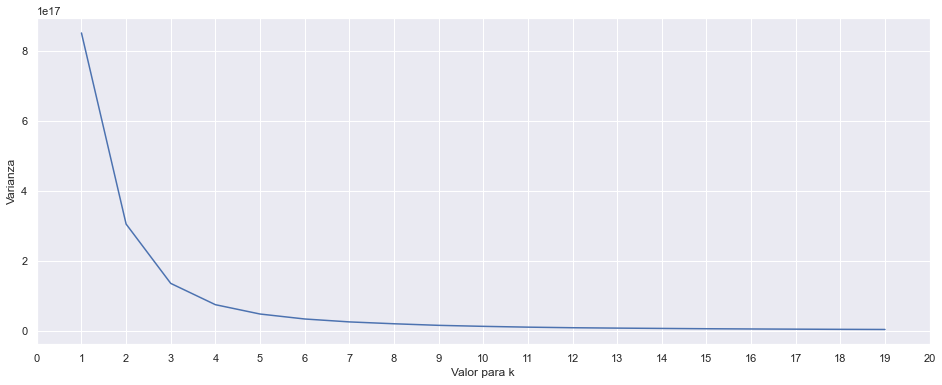

In [142]:
sns.set(style='darkgrid',)
ax = sns.lineplot(x=range(1,20), y=variance)
ax.set(xlabel='Valor para k', ylabel='Varianza')
ax.figure.set_size_inches(10,4)
ax.set_xticks(np.arange(0,21,1))
ax.figure.set_size_inches(16,6)
plt.savefig('codo.png')
plt.show()

Seems like there are 5 clusters according to this plot.

In [145]:
df_apartments_final.isnull().sum()

num_latitud               0
num_longitud              0
num_precioventa           0
des_estadoobra        18325
num_dormitorios           0
des_distritozona       6319
fec_antiguedad           14
num_supconstruida         0
des_tipoanunciante        2
num_banos               702
num_aparcamiento       7982
dtype: int64

In [150]:
X = df_apartments_final.drop(['num_precioventa'], axis=1)
y = df_apartments_final[['num_precioventa']]

In [614]:
original_sizes

((77807, 190), (68532, 190), (62352, 190), (31984, 190))

In [619]:
df['cod_portalinmo'].value_counts()

2    40927
1    40107
3    25906
4    10686
Name: cod_portalinmo, dtype: int64

Seems like the 2nd portal is the best one. It's importtant to note that when we removed the duplicates we deleted the 1st one to appear so there might be some bias.